In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import PercentFormatter
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Getting the data

Reading data with sentiment analysis

In [44]:
gw_sent=pd.read_csv('data/sentiment_analysis/global_warming_sent.csv',index_col='Unnamed: 0')
ab_sent=pd.read_csv('data/sentiment_analysis/abortion_sent.csv',index_col='Unnamed: 0')
gi_sent=pd.read_csv('data/sentiment_analysis/gender_inequality_sent.csv',index_col='Unnamed: 0')
gc_sent=pd.read_csv('data/sentiment_analysis/gun_control_sent.csv',index_col='Unnamed: 0')

In [45]:
# Adding year column
gw_sent['year']=gw_sent['date'].apply(lambda x: x.split('-')[0])
ab_sent['year']=ab_sent['date'].apply(lambda x: x.split('-')[0])
gi_sent['year']=gi_sent['date'].apply(lambda x: x.split('-')[0])
gc_sent['year']=gc_sent['date'].apply(lambda x: x.split('-')[0])

# Adding month column
gw_sent['month']=gw_sent['date'].apply(lambda x: x.split('-')[1])
ab_sent['month']=ab_sent['date'].apply(lambda x: x.split('-')[1])
gi_sent['month']=gi_sent['date'].apply(lambda x: x.split('-')[1])
gc_sent['month']=gc_sent['date'].apply(lambda x: x.split('-')[1])

# Adding year-month column
str1 = ""
gw_sent['year-month']=gw_sent['date'].apply(lambda x: str1.join(x.split('-')[0:2]))
str1 = ""
ab_sent['year-month']=ab_sent['date'].apply(lambda x: str1.join(x.split('-')[0:2]))
str1 = ""
gi_sent['year-month']=gi_sent['date'].apply(lambda x: str1.join(x.split('-')[0:2]))
str1 = ""
gc_sent['year-month']=gc_sent['date'].apply(lambda x: str1.join(x.split('-')[0:2]))

Reading data with speakers attributes

In [46]:
gw=pd.read_csv('data/attributes/global_warming.csv',index_col='Unnamed: 0')
ab=pd.read_csv('data/attributes/abortion.csv',index_col='Unnamed: 0')
gi=pd.read_csv('data/attributes/gender_inequality.csv',index_col='Unnamed: 0')
gc=pd.read_csv('data/attributes/gun_control.csv',index_col='Unnamed: 0')

## Analysis

In [47]:
#Merging information about speakers with sentimental analysis results
gw_at=gw.merge(gw_sent[['quotation', 'speaker','positive scores', 'negative scores', 'compound scores']],how='left',left_on=['quotation','speaker'],right_on=['quotation','speaker']).copy()
gi_at=gi.merge(gi_sent[['quotation', 'speaker','positive scores', 'negative scores', 'compound scores']],how='left',left_on=['quotation','speaker'],right_on=['quotation','speaker']).copy()
gc_at=gc.merge(gc_sent[['quotation', 'speaker','positive scores', 'negative scores', 'compound scores']],how='left',left_on=['quotation','speaker'],right_on=['quotation','speaker']).copy()
ab_at=ab.merge(ab_sent[['quotation', 'speaker','positive scores', 'negative scores', 'compound scores']],how='left',left_on=['quotation','speaker'],right_on=['quotation','speaker']).copy()

### Under the Gender Lens

In [49]:
## Global Warming
# add a gender column with 'female', 'male', or 'other' attributes instead of the IDs  
gw_at['sex']=gw_at['gender'].apply(lambda x: 'male' if x=='[\'Q6581097\']' else 'female' if x=='[\'Q6581072\']' else 'other').copy()
# analyze only male and female
gw_gen=gw_at[gw_at['sex'].isin(['male','female'])].copy()

# split quotes into positive, negative and neutral
positive_gw_gen=gw_gen[gw_gen['compound scores']>=0.05]
negative_gw_gen=gw_gen[gw_gen['compound scores']<=-0.05]
neutral_gw_gen=gw_gen[np.abs(gw_gen['compound scores'])< 0.05]

# calculate the distribution of the three types of quotes for female and male
sizes_f_gw = [positive_gw_gen.groupby('sex').count()['quotation'].female/gw_gen.groupby('sex').count()['quotation'].female,negative_gw_gen.groupby('sex').count()['quotation'].female/gw_gen.groupby('sex').count()['quotation'].female,neutral_gw_gen.groupby('sex').count()['quotation'].female/neutral_gw_gen.groupby('sex').count()['quotation'].female]
sizes_m_gw = [positive_gw_gen.groupby('sex').count()['quotation'].male/gw_gen.groupby('sex').count()['quotation'].male,negative_gw_gen.groupby('sex').count()['quotation'].male/gw_gen.groupby('sex').count()['quotation'].male,neutral_gw_gen.groupby('sex').count()['quotation'].male/neutral_gw_gen.groupby('sex').count()['quotation'].male]


## Abortion
# add a gender column with 'female', 'male', or 'other' attributes instead of the IDs 
ab_at['sex']=ab_at['gender'].apply(lambda x: 'male' if x=='[\'Q6581097\']' else 'female' if x=='[\'Q6581072\']' else 'other').copy()
# analyze only male and female
ab_gen=ab_at[ab_at['sex'].isin(['male','female'])].copy()

# split quotes into positive, negative and neutral
positive_ab_gen=ab_gen[ab_gen['compound scores']>=0.05]
negative_ab_gen=ab_gen[ab_gen['compound scores']<=-0.05]
neutral_ab_gen=ab_gen[np.abs(ab_gen['compound scores'])< 0.05]

# calculate the distribution of the three types of quotes for female and male
sizes_f_ab = [positive_ab_gen.groupby('sex').count()['quotation'].female/ab_gen.groupby('sex').count()['quotation'].female,negative_ab_gen.groupby('sex').count()['quotation'].female/ab_gen.groupby('sex').count()['quotation'].female,neutral_ab_gen.groupby('sex').count()['quotation'].female/neutral_ab_gen.groupby('sex').count()['quotation'].female]
sizes_m_ab = [positive_ab_gen.groupby('sex').count()['quotation'].male/ab_gen.groupby('sex').count()['quotation'].male,negative_ab_gen.groupby('sex').count()['quotation'].male/ab_gen.groupby('sex').count()['quotation'].male,neutral_ab_gen.groupby('sex').count()['quotation'].male/neutral_ab_gen.groupby('sex').count()['quotation'].male]


## Gender Inequality
# add a gender column with 'female', 'male', or 'other' attributes instead of the IDs 
gi_at['sex']=gi_at['gender'].apply(lambda x: 'male' if x=='[\'Q6581097\']' else 'female' if x=='[\'Q6581072\']' else 'other').copy()
# analyze only male and female
gi_gen=gi_at[gi_at['sex'].isin(['male','female'])].copy()

# split quotes into positive, negative and neutral
positive_gi_gen=gi_gen[gi_gen['compound scores']>=0.05]
negative_gi_gen=gi_gen[gi_gen['compound scores']<=-0.05]
neutral_gi_gen=gi_gen[np.abs(gi_gen['compound scores'])< 0.05]

# calculate the distribution of the three types of quotes for female and male
sizes_f_gi = [positive_gi_gen.groupby('sex').count()['quotation'].female/gi_gen.groupby('sex').count()['quotation'].female,negative_gi_gen.groupby('sex').count()['quotation'].female/gi_gen.groupby('sex').count()['quotation'].female,neutral_gi_gen.groupby('sex').count()['quotation'].female/neutral_gi_gen.groupby('sex').count()['quotation'].female]
sizes_m_gi = [positive_gi_gen.groupby('sex').count()['quotation'].male/gi_gen.groupby('sex').count()['quotation'].male,negative_gi_gen.groupby('sex').count()['quotation'].male/gi_gen.groupby('sex').count()['quotation'].male,neutral_gi_gen.groupby('sex').count()['quotation'].male/neutral_gi_gen.groupby('sex').count()['quotation'].male]


## Gun Control
# add a gender column with 'female', 'male', or 'other' attributes instead of the IDs 
gc_at['sex']=gc_at['gender'].apply(lambda x: 'male' if x=='[\'Q6581097\']' else 'female' if x=='[\'Q6581072\']' else 'other').copy()
# analyze only male and female
gc_gen=gc_at[gc_at['sex'].isin(['male','female'])].copy()

# split quotes into positive, negative and neutral
positive_gc_gen=gc_gen[gc_gen['compound scores']>=0.05]
negative_gc_gen=gc_gen[gc_gen['compound scores']<=-0.05]
neutral_gc_gen=gc_gen[np.abs(gc_gen['compound scores'])< 0.05]

# calculate the distribution of the three types of quotes for female and male
sizes_f_gc = [positive_gc_gen.groupby('sex').count()['quotation'].female/gc_gen.groupby('sex').count()['quotation'].female,negative_gc_gen.groupby('sex').count()['quotation'].female/gc_gen.groupby('sex').count()['quotation'].female,neutral_gc_gen.groupby('sex').count()['quotation'].female/neutral_gc_gen.groupby('sex').count()['quotation'].female]
sizes_m_gc = [positive_gc_gen.groupby('sex').count()['quotation'].male/gc_gen.groupby('sex').count()['quotation'].male,negative_gc_gen.groupby('sex').count()['quotation'].male/gc_gen.groupby('sex').count()['quotation'].male,neutral_gc_gen.groupby('sex').count()['quotation'].male/neutral_gc_gen.groupby('sex').count()['quotation'].male]

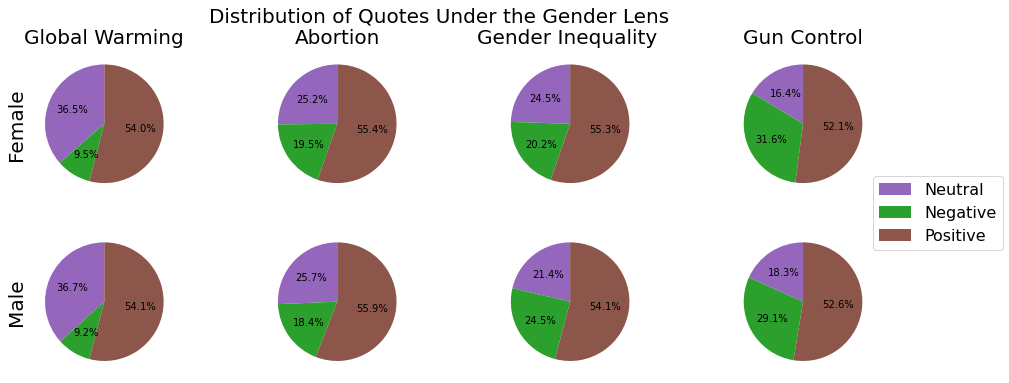

<Figure size 432x288 with 0 Axes>

In [52]:
# Pie chart
labels = ['Neutral', 'Negative','Positive']
fig, axs=plt.subplots(2,4,figsize=(16,6))

# plot for Global Warming split into female and male
axs[0,0].pie(sizes_f_gw, autopct='%1.1f%%', startangle=90, colors = ['C4', 'C2', 'C5'], textprops={'fontsize': 10})
axs[1,0].pie(sizes_m_gw,  autopct='%1.1f%%', startangle=90, colors = ['C4', 'C2', 'C5'], textprops={'fontsize': 10})
# set local title
axs[0,0].set_title('Global Warming', fontsize = 20)

# set the ylabels for all the pie charts
axs[0,0].set_ylabel('Female', fontsize = 20)
axs[1,0].set_ylabel('Male', fontsize = 20)

# plot for Abortion split into female and male
axs[0,1].pie(sizes_f_ab,  autopct='%1.1f%%', startangle=90, colors = ['C4', 'C2', 'C5'], textprops={'fontsize': 10})
axs[1,1].pie(sizes_m_ab,  autopct='%1.1f%%', startangle=90,colors = ['C4', 'C2', 'C5'], textprops={'fontsize': 10})
# set local title
axs[0,1].set_title('Abortion' , fontsize = 20)

# plot for Gender Inequality split into female and male
axs[0,2].pie(sizes_f_gi, autopct='%1.1f%%', startangle=90, colors = ['C4', 'C2', 'C5'], textprops={'fontsize': 10})
axs[1,2].pie(sizes_m_gi,  autopct='%1.1f%%', startangle=90, colors = ['C4', 'C2', 'C5'], textprops={'fontsize': 10})
# set local title
axs[0,2].set_title('Gender Inequality ', fontsize = 20)

# plot for Gun Control split into female and male
axs[0,3].pie(sizes_f_gc, autopct='%1.1f%%', startangle=90, colors = ['C4', 'C2', 'C5'], textprops={'fontsize': 10})
axs[1,3].pie(sizes_m_gc, autopct='%1.1f%%', startangle=90,colors = ['C4', 'C2', 'C5'], textprops={'fontsize': 10})
# set local title
axs[0,3].set_title('Gun Control' , fontsize = 20)

# include legend with the labels corresponding to the slices of the pie chart
plt.legend(labels, loc = 1, bbox_to_anchor=(1.4, 0.9, 0.5, 0.5), fontsize = 16)

# set global title
plt.suptitle('Distribution of Quotes Under the Gender Lens', fontsize= 20)

plt.show()

plt.tight_layout()

None

# save figure
fig.savefig('Figures/dist_quotes_gender.jpeg', dpi = 200)
fig.savefig('Figures/dist_quotes_gender.pdf')

### Splitting over attributes: academic degree, nationality, religion

In [187]:
#academic degrees: the corresponding ID for the four levels of academic degrees that appeared in our data
bach=['Q13948235','Q787674','Q66309803','Q163727','Q2085288','Q2878189','Q17193488','Q65034954','Q913603','Q798129', 'Q10752757','Q4838826','Q1765120','Q56760985','Q4838827','Q798132','Q2188853','Q798137','Q65964142']
mas=['Q15710741','Q12580940', 'Q1907898','Q183816','Q65553818','Q4175466','Q6785206','Q1527520','Q15710749','Q6785261','Q10636155','Q191701','Q12326374','Q6785273','Q2903406','Q6785201','Q6785179', 'Q950900','Q754848','Q1907865', 'Q2091008','Q6785231','Q3297864']
doc=['Q19603972','Q18002832','Q4212319','Q18071588','Q19610212','Q17744738','Q19603970','Q16739651','Q19610193','Q18523811','Q19610206','Q19610320','Q1771785','Q17166198','Q17281084','Q3033568','Q12198834','Q17281072','Q959320','Q4618975','Q17281087','Q17281125','Q503765','Q1984623','Q913404','Q3033549','Q12101789','Q12101787','Q752297','Q3487030','Q17281097','Q1253774','Q2248352','Q837184','Q17281188','Q2628227','Q17281165','Q849697','Q1540185','Q11415564','Q1233911','Q2754873','Q3033550','Q18745564','Q17281156','Q6518699']

#encoding academic degree
    # for global warming
gw_at_deg = gw_at.dropna(subset=['academic_degree']).copy()
gw_at_deg['degree']=gw_at_deg['academic_degree'].apply(lambda x: 'doctor' if len(set(x.strip('[]').replace('\'','').split(' '))&set(doc))>0  else 'master' if len(set(x.strip('[]').replace('\'','').split(' '))&set(mas))>0 else 'bachelor' if len(set(x.strip('[]').replace('\'','').split(' '))&set(bach))>0 else None)
gw_at_deg=gw_at_deg.dropna(subset=['degree']).copy()
    # for gun control
gc_at_deg=gc_at.dropna(subset=['academic_degree']).copy()
gc_at_deg['degree']=gc_at_deg['academic_degree'].apply(lambda x: 'doctor' if len(set(x.strip('[]').replace('\'','').split(' '))&set(doc))>0  else 'master' if len(set(x.strip('[]').replace('\'','').split(' '))&set(mas))>0 else 'bachelor' if len(set(x.strip('[]').replace('\'','').split(' '))&set(bach))>0 else None)
gc_at_deg=gc_at_deg.dropna(subset=['degree']).copy()
    # for gender inequality
gi_at_deg=gi_at.dropna(subset=['academic_degree']).copy()
gi_at_deg['degree']=gi_at_deg['academic_degree'].apply(lambda x: 'doctor' if len(set(x.strip('[]').replace('\'','').split(' '))&set(doc))>0  else 'master' if len(set(x.strip('[]').replace('\'','').split(' '))&set(mas))>0 else 'bachelor' if len(set(x.strip('[]').replace('\'','').split(' '))&set(bach))>0 else None)
gi_at_deg=gi_at_deg.dropna(subset=['degree']).copy()
    # for abortion
ab_at_deg=ab_at.dropna(subset=['academic_degree']).copy()
ab_at_deg['degree']=ab_at_deg['academic_degree'].apply(lambda x: 'doctor' if len(set(x.strip('[]').replace('\'','').split(' '))&set(doc))>0 else 'master' if len(set(x.strip('[]').replace('\'','').split(' '))&set(mas))>0 else 'bachelor' if len(set(x.strip('[]').replace('\'','').split(' '))&set(bach))>0 else None)
ab_at_deg=ab_at_deg.dropna(subset=['degree']).copy()

#encoding nationality (most frequent)
    # for global warming
gw_at_nat=gw_at.dropna(subset=['nationality']).copy()
gw_at_nat['nation']=gw_at_nat['nationality'].apply(lambda x: 'USA' if x.strip('[]').replace('\'','')=='Q30' else 'UK' if x.strip('[]').replace('\'','')=='Q145' else 'Australia' if x.strip('[]').replace('\'','')=='Q408' else 'Canada' if x.strip('[]').replace('\'','')=='Q16' else 'India' if x.strip('[]').replace('\'','')=='Q668' else 'Germany' if x.strip('[]').replace('\'','')=='Q183' else 'New Zeland' if x.strip('[]').replace('\'','')=='Q664' else 'France' if x.strip('[]').replace('\'','')=='Q143' else 'Ireland' if x.strip('[]').replace('\'','')=='Q27'  else 'None')
gw_at_nat=gw_at_nat.dropna(subset=['nationality']).copy()
    # for gun control
gc_at_nat=gc_at.dropna(subset=['nationality']).copy()
gc_at_nat['nation']=gc_at_nat['nationality'].apply(lambda x: 'USA' if x.strip('[]').replace('\'','')=='Q30' else 'UK' if x.strip('[]').replace('\'','')=='Q145' else 'Australia' if x.strip('[]').replace('\'','')=='Q408' else 'Canada' if x.strip('[]').replace('\'','')=='Q16' else 'India' if x.strip('[]').replace('\'','')=='Q668' else 'Germany' if x.strip('[]').replace('\'','')=='Q183' else 'New Zeland' if x.strip('[]').replace('\'','')=='Q664' else 'France' if x.strip('[]').replace('\'','')=='Q143' else 'Ireland' if x.strip('[]').replace('\'','')=='Q27'  else 'None')
gc_at_nat=gc_at_nat.dropna(subset=['nationality']).copy()
    # for gender inequality
gi_at_nat=gi_at.dropna(subset=['nationality']).copy()
gi_at_nat['nation']=gi_at_nat['nationality'].apply(lambda x: 'USA' if x.strip('[]').replace('\'','')=='Q30' else 'UK' if x.strip('[]').replace('\'','')=='Q145' else 'Australia' if x.strip('[]').replace('\'','')=='Q408' else 'Canada' if x.strip('[]').replace('\'','')=='Q16' else 'India' if x.strip('[]').replace('\'','')=='Q668' else 'Germany' if x.strip('[]').replace('\'','')=='Q183' else 'New Zeland' if x.strip('[]').replace('\'','')=='Q664' else 'France' if x.strip('[]').replace('\'','')=='Q143' else 'Ireland' if x.strip('[]').replace('\'','')=='Q27'  else 'None')
gi_at_nat=gi_at_nat.dropna(subset=['nationality']).copy()
    # for abortion
ab_at_nat=ab_at.dropna(subset=['nationality']).copy()
ab_at_nat['nation']=ab_at_nat['nationality'].apply(lambda x: 'USA' if x.strip('[]').replace('\'','')=='Q30' else 'UK' if x.strip('[]').replace('\'','')=='Q145' else 'Australia' if x.strip('[]').replace('\'','')=='Q408' else 'Canada' if x.strip('[]').replace('\'','')=='Q16' else 'India' if x.strip('[]').replace('\'','')=='Q668' else 'Germany' if x.strip('[]').replace('\'','')=='Q183' else 'New Zeland' if x.strip('[]').replace('\'','')=='Q664' else 'France' if x.strip('[]').replace('\'','')=='Q143' else 'Ireland' if x.strip('[]').replace('\'','')=='Q27'  else 'None')
ab_at_nat=ab_at_nat.dropna(subset=['nationality']).copy()

#religions: the corresponding ID for the seven religions
agn=['Q288928']
cat=['Q1841','Q9592','Q6423963','Q178169','Q93191','Q75809','Q1351880','Q33203','Q23540','Q5415672','Q922480']
ath=['Q7066']
christ=['Q5043']
hind=['Q9089','Q748','Q9581']
jud=['Q9268']
isl =['Q432','Q483654'] 

#encoding religion (most frequent)
    # for global warming
gw_at_rel=gw_at.dropna(subset=['religion']).copy()
gw_at_rel['rel']=gw_at_rel['religion'].apply(lambda x: 'agnostic' if len(set(x.strip('[]').replace('\'','').split(' '))&set(agn))>0 else 'catholic' if len(set(x.strip('[]').replace('\'','').split(' '))&set(cat))>0 else 'atheist' if len(set(x.strip('[]').replace('\'','').split(' '))&set(ath))>0 else 'christian' if len(set(x.strip('[]').replace('\'','').split(' '))&set(christ))>0 else 'hinduism' if len(set(x.strip('[]').replace('\'','').split(' '))&set(hind))>0 else 'jewish' if len(set(x.strip('[]').replace('\'','').split(' '))&set(jud))>0 else 'islam' if len(set(x.strip('[]').replace('\'','').split(' '))&set(isl))>0 else None)
gw_at_rel=gw_at_rel.dropna(subset=['rel']).copy()
    # for gun control
gc_at_rel=gc_at.dropna(subset=['religion']).copy()
gc_at_rel['rel']=gc_at_rel['religion'].apply(lambda x: 'agnostic' if len(set(x.strip('[]').replace('\'','').split(' '))&set(agn))>0 else 'catholic' if len(set(x.strip('[]').replace('\'','').split(' '))&set(cat))>0 else 'atheist' if len(set(x.strip('[]').replace('\'','').split(' '))&set(ath))>0 else 'christian' if len(set(x.strip('[]').replace('\'','').split(' '))&set(christ))>0 else 'hinduism' if len(set(x.strip('[]').replace('\'','').split(' '))&set(hind))>0 else 'jewish' if len(set(x.strip('[]').replace('\'','').split(' '))&set(jud))>0 else 'islam' if len(set(x.strip('[]').replace('\'','').split(' '))&set(isl))>0 else None)
gc_at_rel=gc_at_rel.dropna(subset=['rel']).copy()
    # for gender inequality
gi_at_rel=gi_at.dropna(subset=['religion']).copy()
gi_at_rel['rel']=gi_at_rel['religion'].apply(lambda x: 'agnostic' if len(set(x.strip('[]').replace('\'','').split(' '))&set(agn))>0 else 'catholic' if len(set(x.strip('[]').replace('\'','').split(' '))&set(cat))>0 else 'atheist' if len(set(x.strip('[]').replace('\'','').split(' '))&set(ath))>0 else 'christian' if len(set(x.strip('[]').replace('\'','').split(' '))&set(christ))>0 else 'hinduism' if len(set(x.strip('[]').replace('\'','').split(' '))&set(hind))>0 else 'jewish' if len(set(x.strip('[]').replace('\'','').split(' '))&set(jud))>0 else 'islam' if len(set(x.strip('[]').replace('\'','').split(' '))&set(isl))>0 else None)
gi_at_rel=gi_at_rel.dropna(subset=['rel']).copy()
    # for abortion
ab_at_rel=ab_at.dropna(subset=['religion']).copy()
ab_at_rel['rel']=ab_at_rel['religion'].apply(lambda x: 'agnostic' if len(set(x.strip('[]').replace('\'','').split(' '))&set(agn))>0 else 'catholic' if len(set(x.strip('[]').replace('\'','').split(' '))&set(cat))>0 else 'atheist' if len(set(x.strip('[]').replace('\'','').split(' '))&set(ath))>0 else 'christian' if len(set(x.strip('[]').replace('\'','').split(' '))&set(christ))>0 else 'hinduism' if len(set(x.strip('[]').replace('\'','').split(' '))&set(hind))>0 else 'jewish' if len(set(x.strip('[]').replace('\'','').split(' '))&set(jud))>0 else 'islam' if len(set(x.strip('[]').replace('\'','').split(' '))&set(isl))>0 else None)
ab_at_rel=ab_at_rel.dropna(subset=['rel']).copy()

ddd=pd.DataFrame ([i.strip('[]').replace('\'','') for i in gw.groupby('ethnic_group').count().sort_values(by='quotation',ascending=False).head(20).index],columns=['ethnic'])
#md=ddd.merge(meta,how='left',left_on='ethnic',right_on='QID')


### Religion

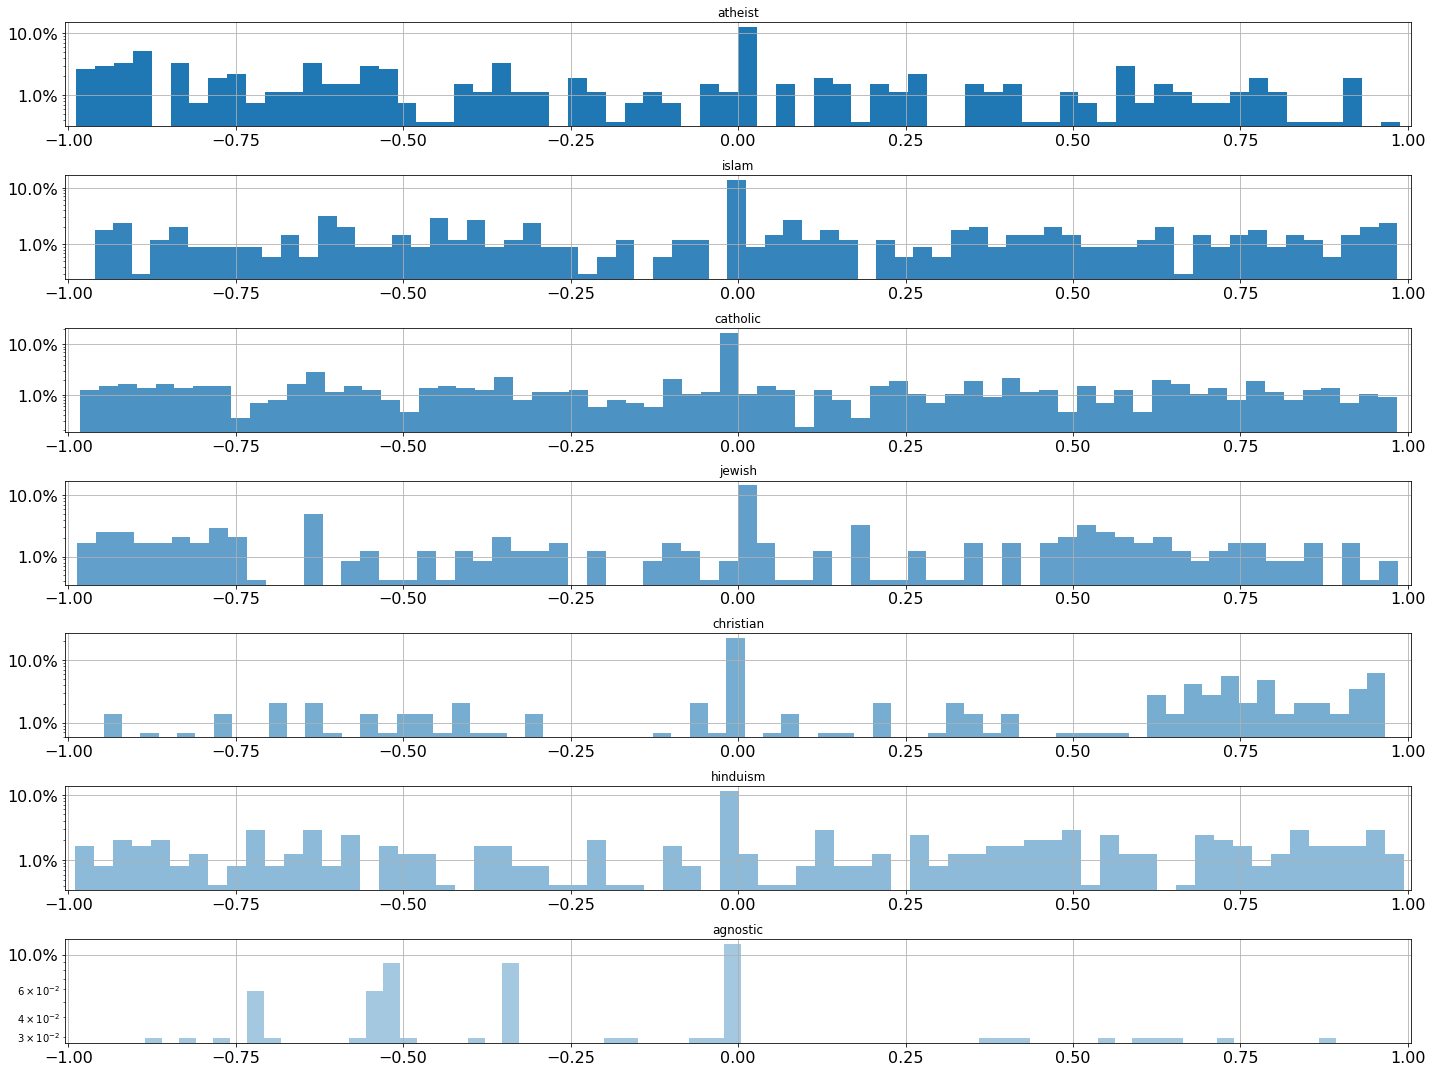

In [79]:
# Gender Inequality: observing distrubutions of compound score over religion

fig, axs = plt.subplots(7,figsize=(20,15))
alpha_score = 1

for i in range(0,7):
    religion = gi_at_rel['rel'].unique()[i]
    weight = np.ones(gi_at_rel[gi_at_rel['rel'] == religion]['compound scores'].shape[0])/gi_at_rel[gi_at_rel['rel'] == religion]['compound scores'].shape[0]
    axs[i].hist(gi_at_rel[gi_at_rel['rel'] == religion]['compound scores'], alpha =alpha_score, weights = weight, bins = 70)
    axs[i].title.set_text(religion)
    alpha_score -= 0.1

    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
    
    # set yaxis to percentage
    axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # make the plot tight
    fig.tight_layout()

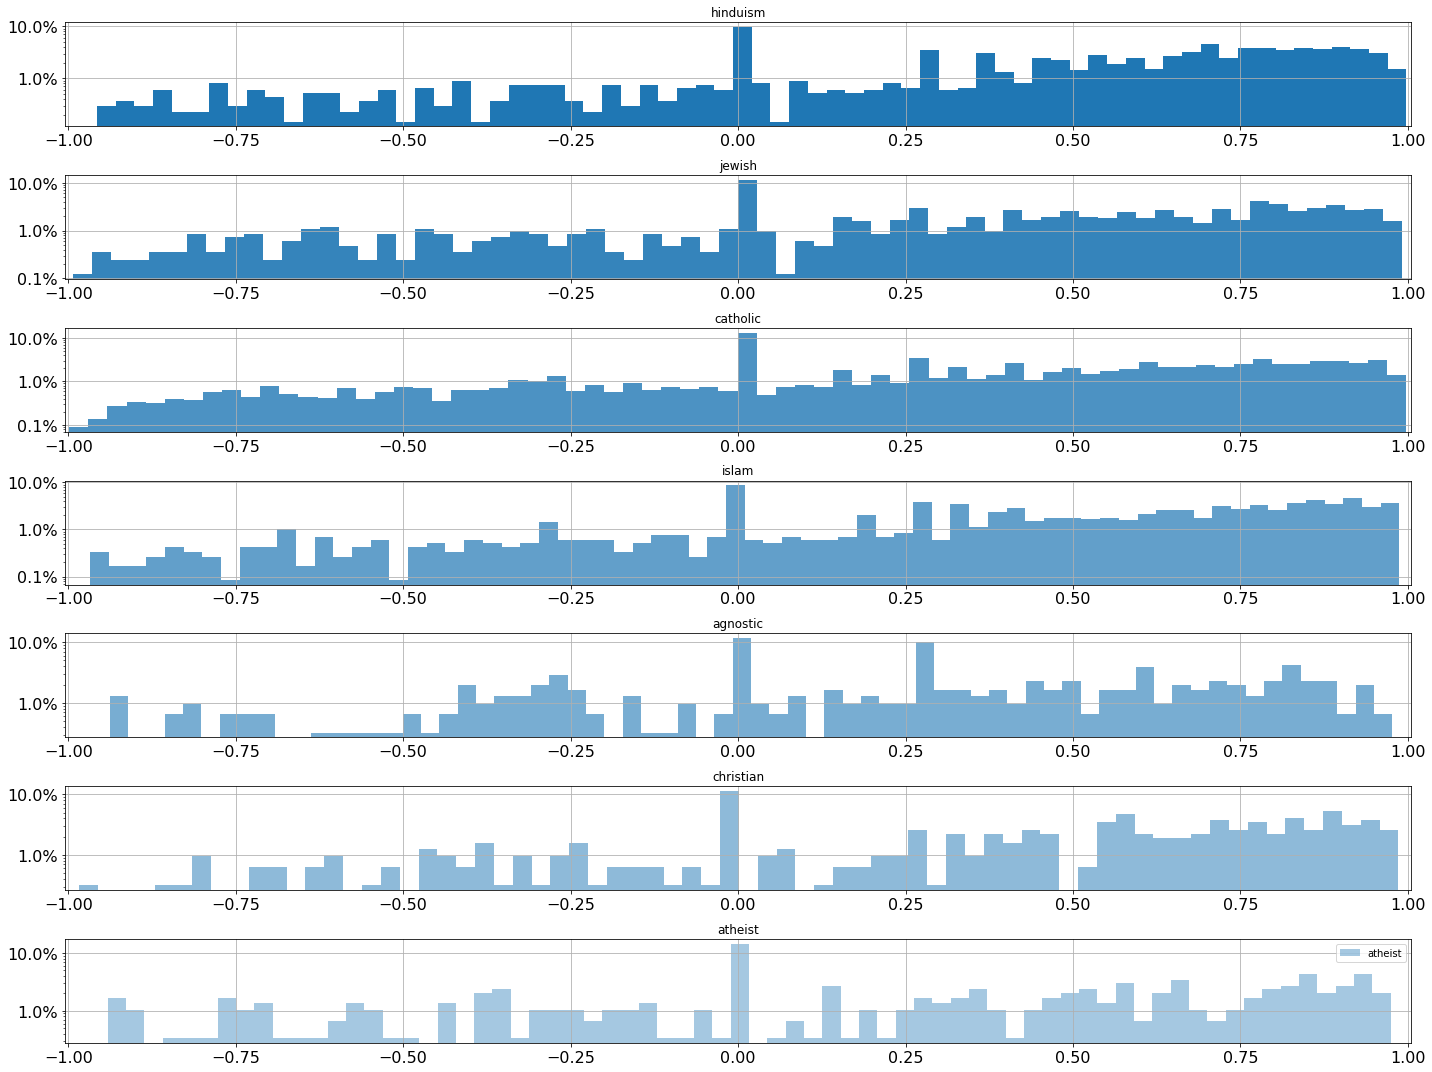

In [82]:
# Global Warming: observing distrubutions of compound score over religion

fig, axs = plt.subplots(7,figsize=(20,15))
alpha_score = 1

for i in range(0,7):
    religion = gw_at_rel['rel'].unique()[i]
    weight = np.ones(gw_at_rel[gw_at_rel['rel'] == religion]['compound scores'].shape[0])/gw_at_rel[gw_at_rel['rel'] == religion]['compound scores'].shape[0]
    axs[i].hist(gw_at_rel[gw_at_rel['rel'] == religion]['compound scores'], alpha =alpha_score, weights = weight, bins = 70)
    axs[i].title.set_text(religion)
    alpha_score -= 0.1
    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
    
    # set yaxis to percentage
    axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # make the plot tight
    fig.tight_layout()
    
plt.legend(gi_at_rel['rel'].unique())
None

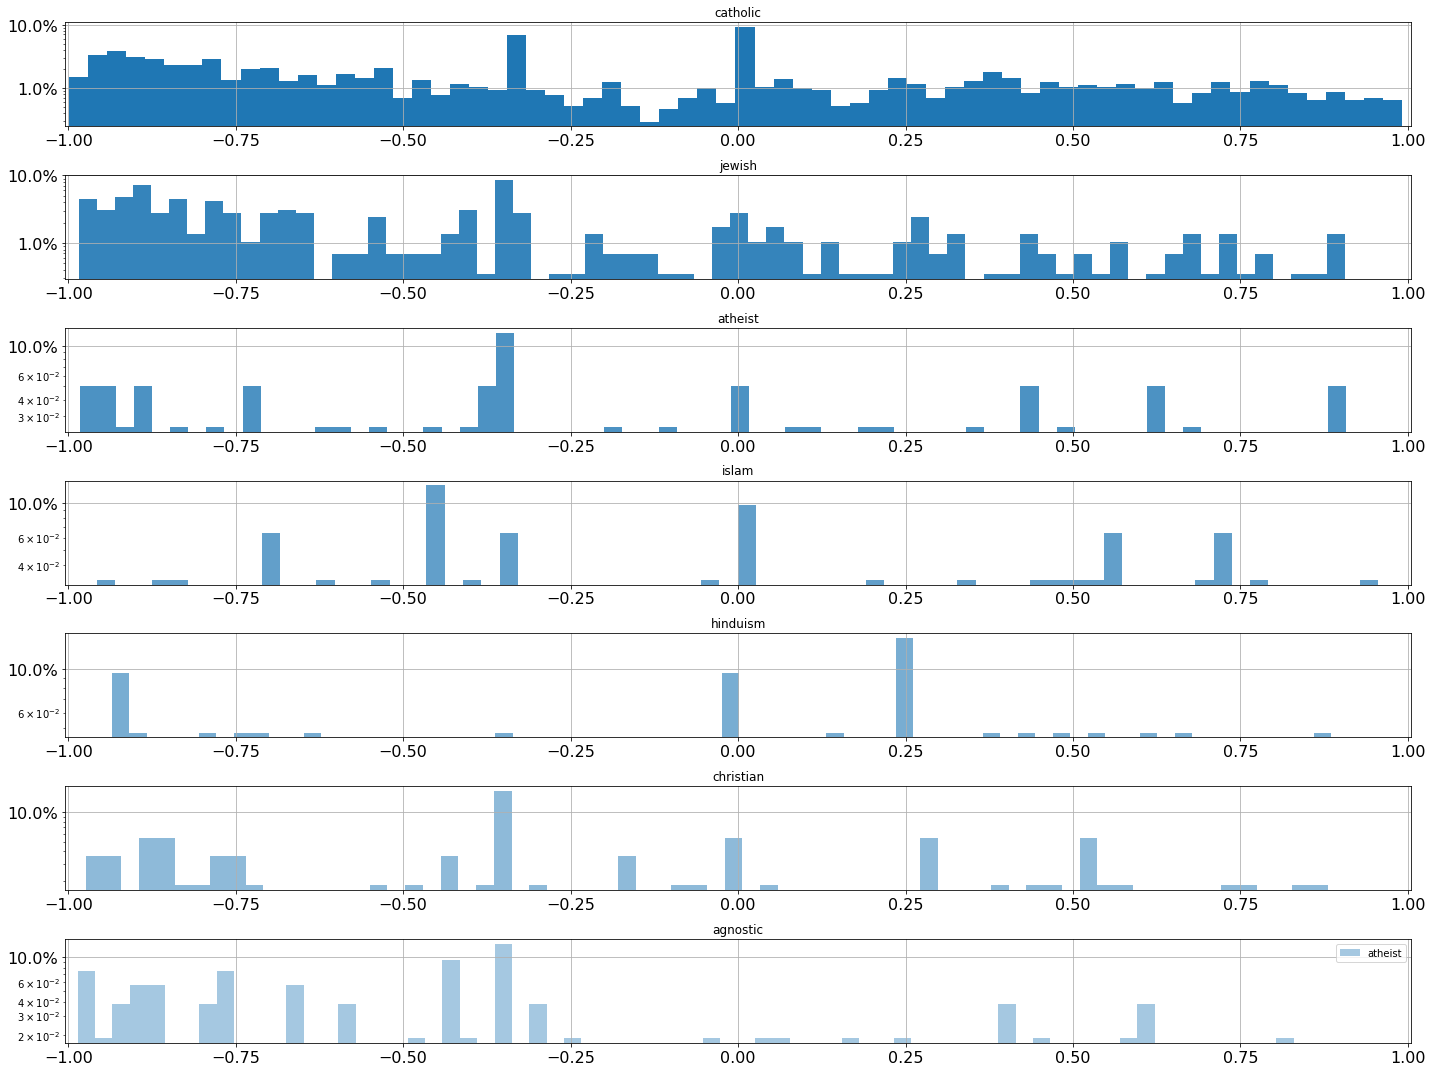

In [83]:
# Gun Control: observing distrubutions of compound score over religion

fig, axs = plt.subplots(7,figsize=(20,15))
alpha_score = 1

for i in range(0,7):
    religion = gc_at_rel['rel'].unique()[i]
    weight = np.ones(gc_at_rel[gc_at_rel['rel'] == religion]['compound scores'].shape[0])/gc_at_rel[gc_at_rel['rel'] == religion]['compound scores'].shape[0]
    axs[i].hist(gc_at_rel[gc_at_rel['rel'] == religion]['compound scores'], alpha =alpha_score, weights = weight, bins = 70)
    axs[i].title.set_text(religion)
    alpha_score -= 0.1

    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
    
    # set yaxis to percentage
    axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # make the plot tight
    fig.tight_layout()

plt.legend(gi_at_rel['rel'].unique())
None

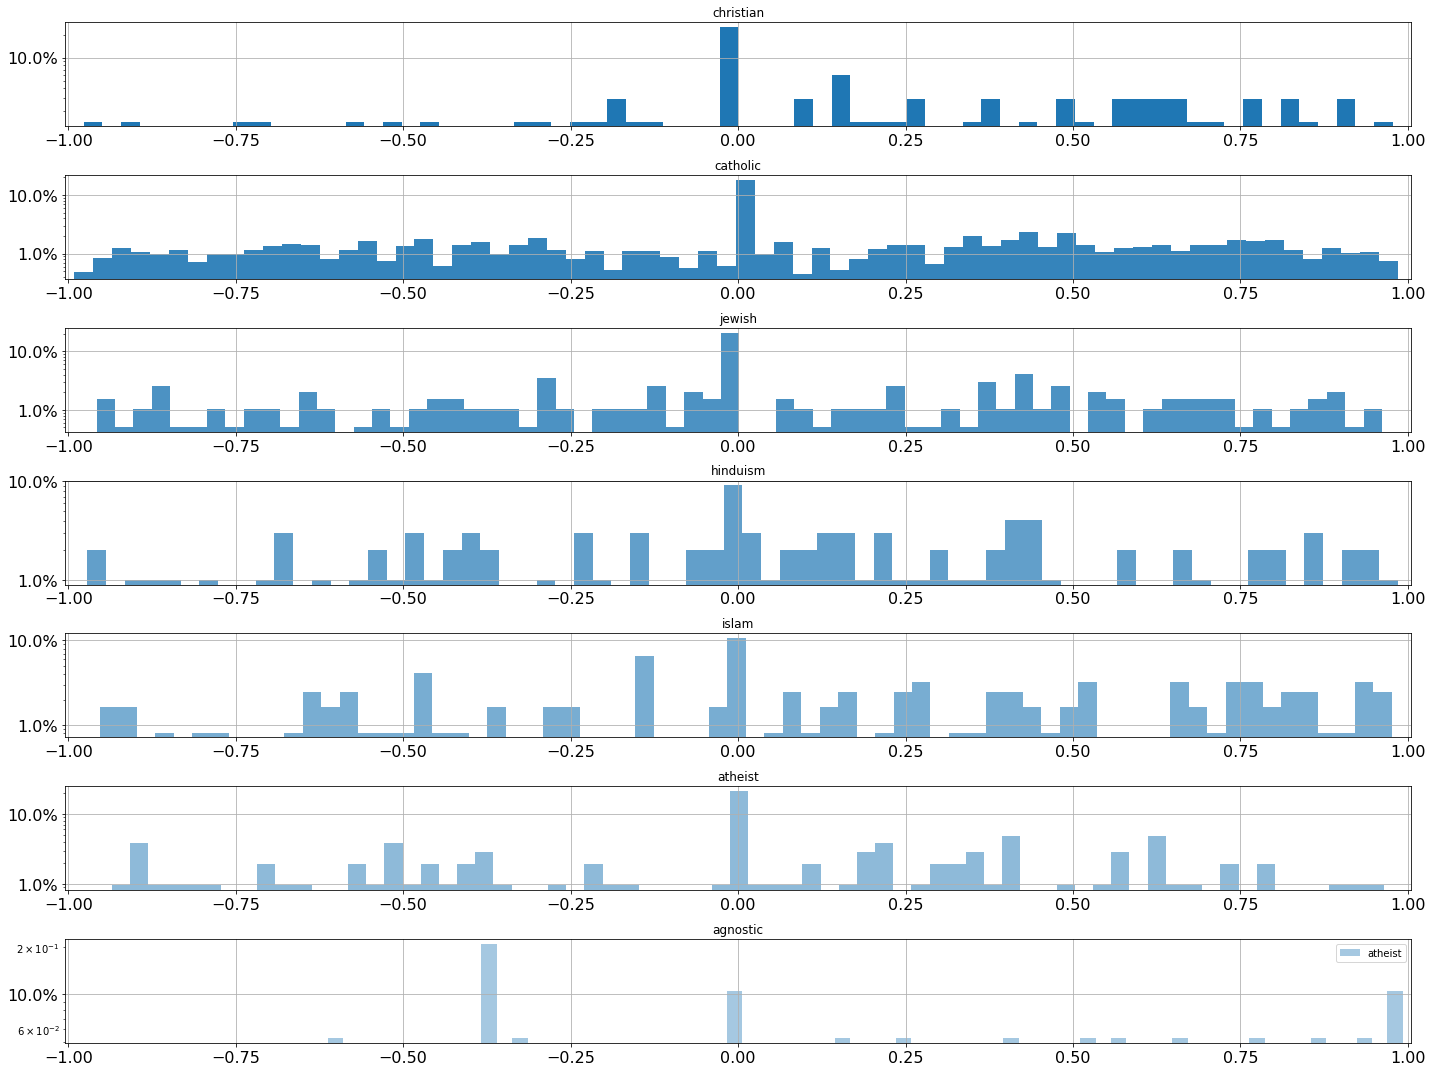

In [85]:
# Abortion: observing distrubutions of compound score over religion

fig, axs = plt.subplots(7,figsize=(20,15))
alpha_score = 1

for i in range(0,7):
    religion = ab_at_rel['rel'].unique()[i]
    weight = np.ones(ab_at_rel[ab_at_rel['rel'] == religion]['compound scores'].shape[0])/ab_at_rel[ab_at_rel['rel'] == religion]['compound scores'].shape[0]
    axs[i].hist(ab_at_rel[ab_at_rel['rel'] == religion]['compound scores'], alpha =alpha_score, weights = weight, bins = 70)
    axs[i].title.set_text(religion)
    alpha_score -= 0.1

    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
    
    # set yaxis to percentage
    axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # make the plot tight
    fig.tight_layout()
    
plt.legend(gi_at_rel['rel'].unique())
None

### Nationality

In [86]:
gi_at_nat.head()
gi_at_nat['nation'].unique()

array(['USA', 'Australia', 'None', 'Canada', 'UK', 'Ireland', 'Germany',
       'New Zeland', 'India'], dtype=object)

C:\Users\tihon\AppData\Local\Temp/ipykernel_3276/2542870768.py:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axs[i].set_ylim([0, 10**3])


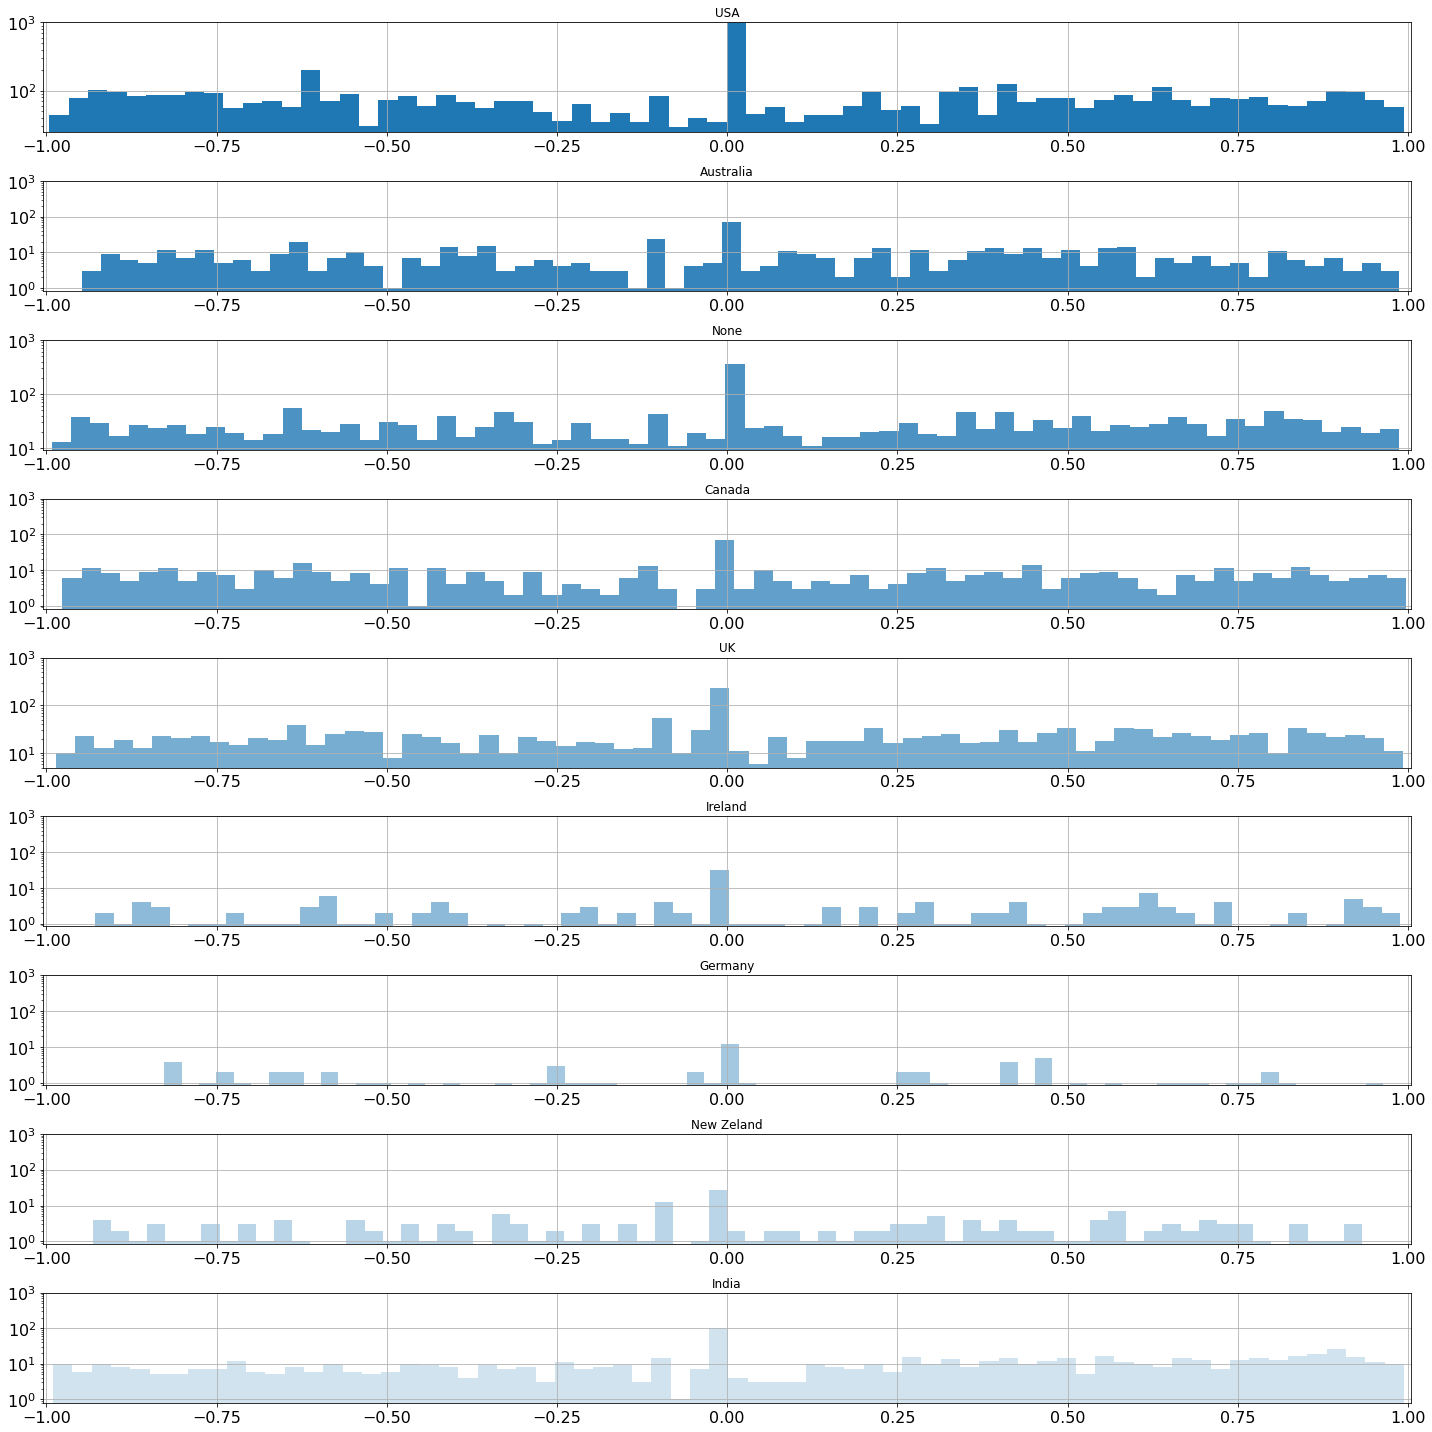

In [88]:
# Gender inequality: observing distrubutions of compound score over nationality

fig, axs = plt.subplots(9,figsize=(20,20))
alpha_score = 1

for i in range(0,9):
    nation = gi_at_nat['nation'].unique()[i]
    weight = np.ones(gi_at_nat[gi_at_nat['nation'] == nation]['compound scores'].shape[0])/gi_at_nat[gi_at_nat['nation'] == nation]['compound scores'].shape[0]
    axs[i].hist(gi_at_nat[gi_at_nat['nation'] == nation]['compound scores'], alpha =alpha_score,  bins = 70)
    axs[i].title.set_text(nation)
    alpha_score -= 0.1
    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
    axs[i].set_ylim([0, 10**3])
    
    # set yaxis to percentage
   # axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # make the plot tight
    fig.tight_layout()

C:\Users\tihon\AppData\Local\Temp/ipykernel_3276/632444225.py:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axs[i].set_ylim([0, 10**4])


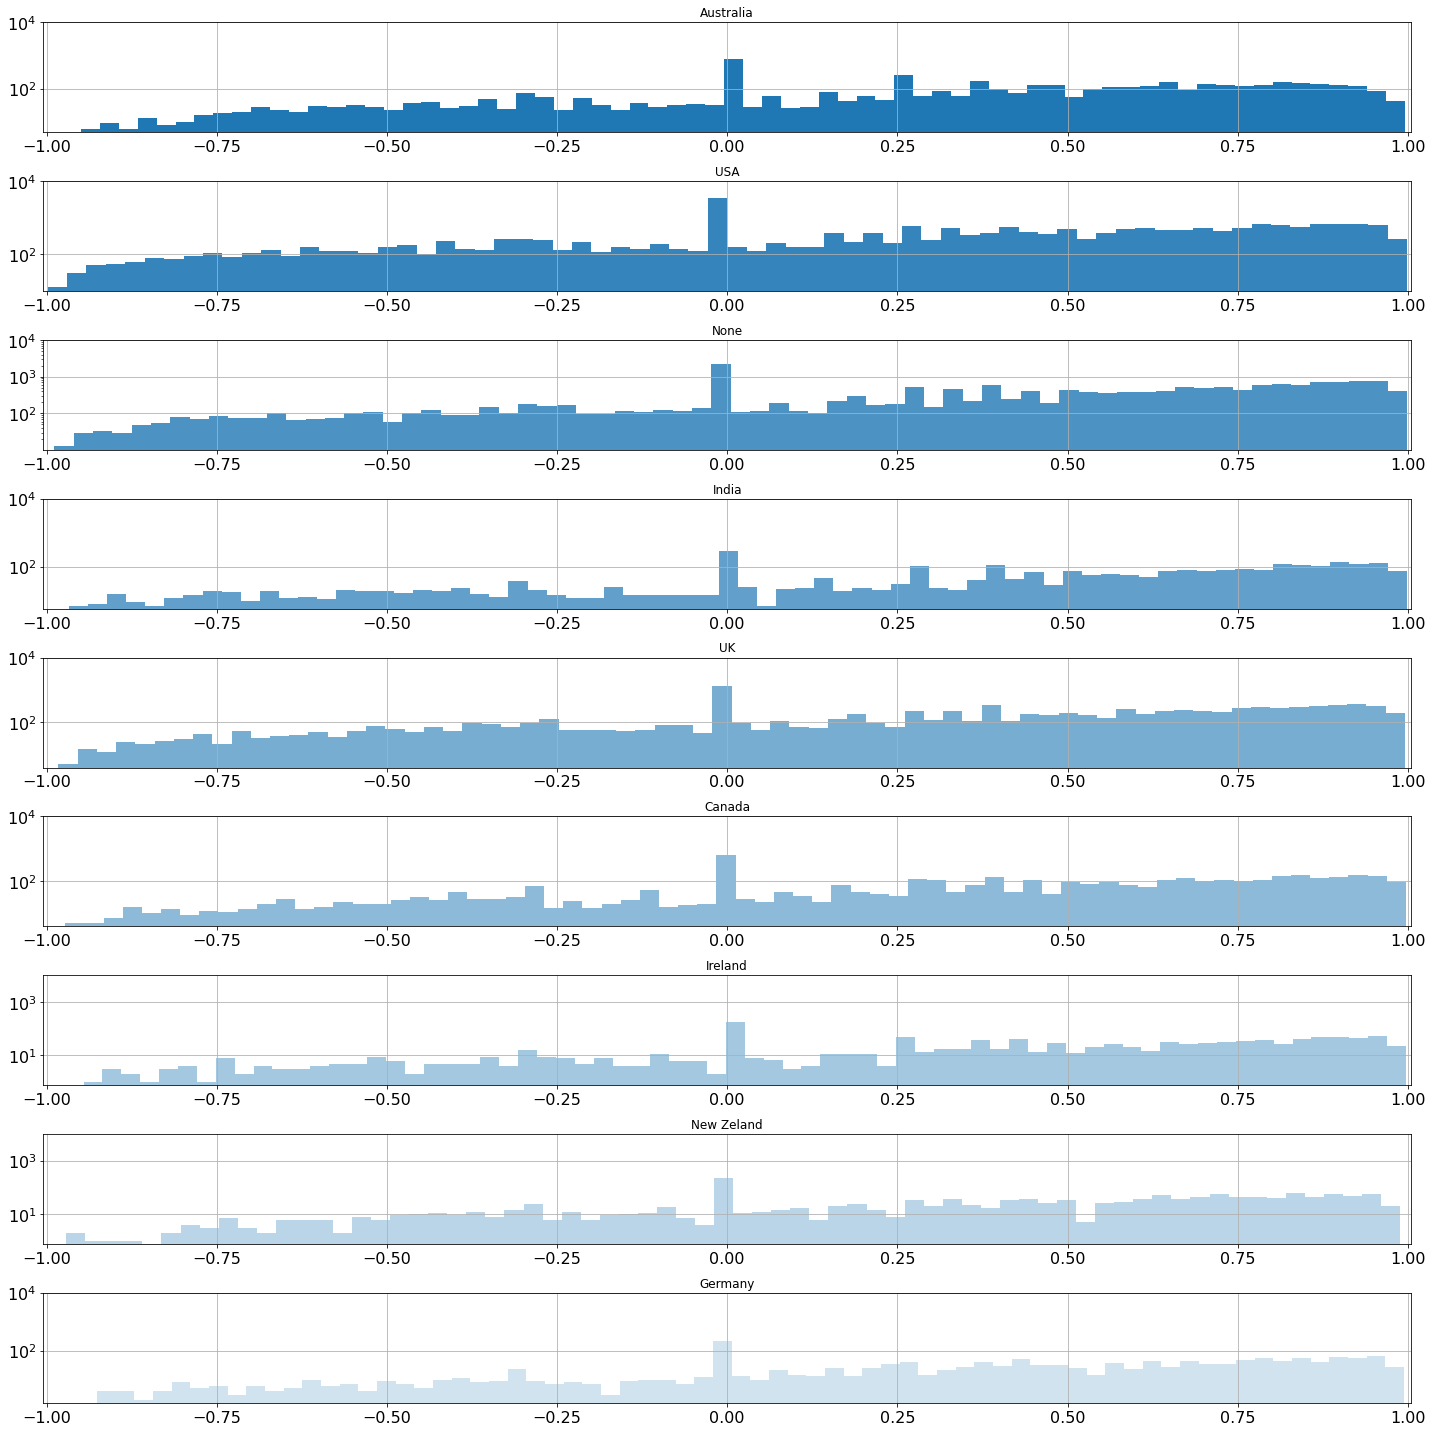

In [89]:
# Global warming: observing distrubutions of compound score over nationality

fig, axs = plt.subplots(9,figsize=(20,20))
alpha_score = 1

for i in range(0,9):
    nation = gw_at_nat['nation'].unique()[i]
    weight = np.ones(gw_at_nat[gw_at_nat['nation'] == nation]['compound scores'].shape[0])/gw_at_nat[gw_at_nat['nation'] == nation]['compound scores'].shape[0]
    axs[i].hist(gw_at_nat[gw_at_nat['nation'] == nation]['compound scores'], alpha =alpha_score,  bins = 70)
    axs[i].title.set_text(nation)
    alpha_score -= 0.1
    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
    axs[i].set_ylim([0, 10**4])
    
    # set yaxis to percentage
   # axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # make the plot tight
    fig.tight_layout()

C:\Users\tihon\AppData\Local\Temp/ipykernel_3276/1908352305.py:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axs[i].set_ylim([0, 10**3])


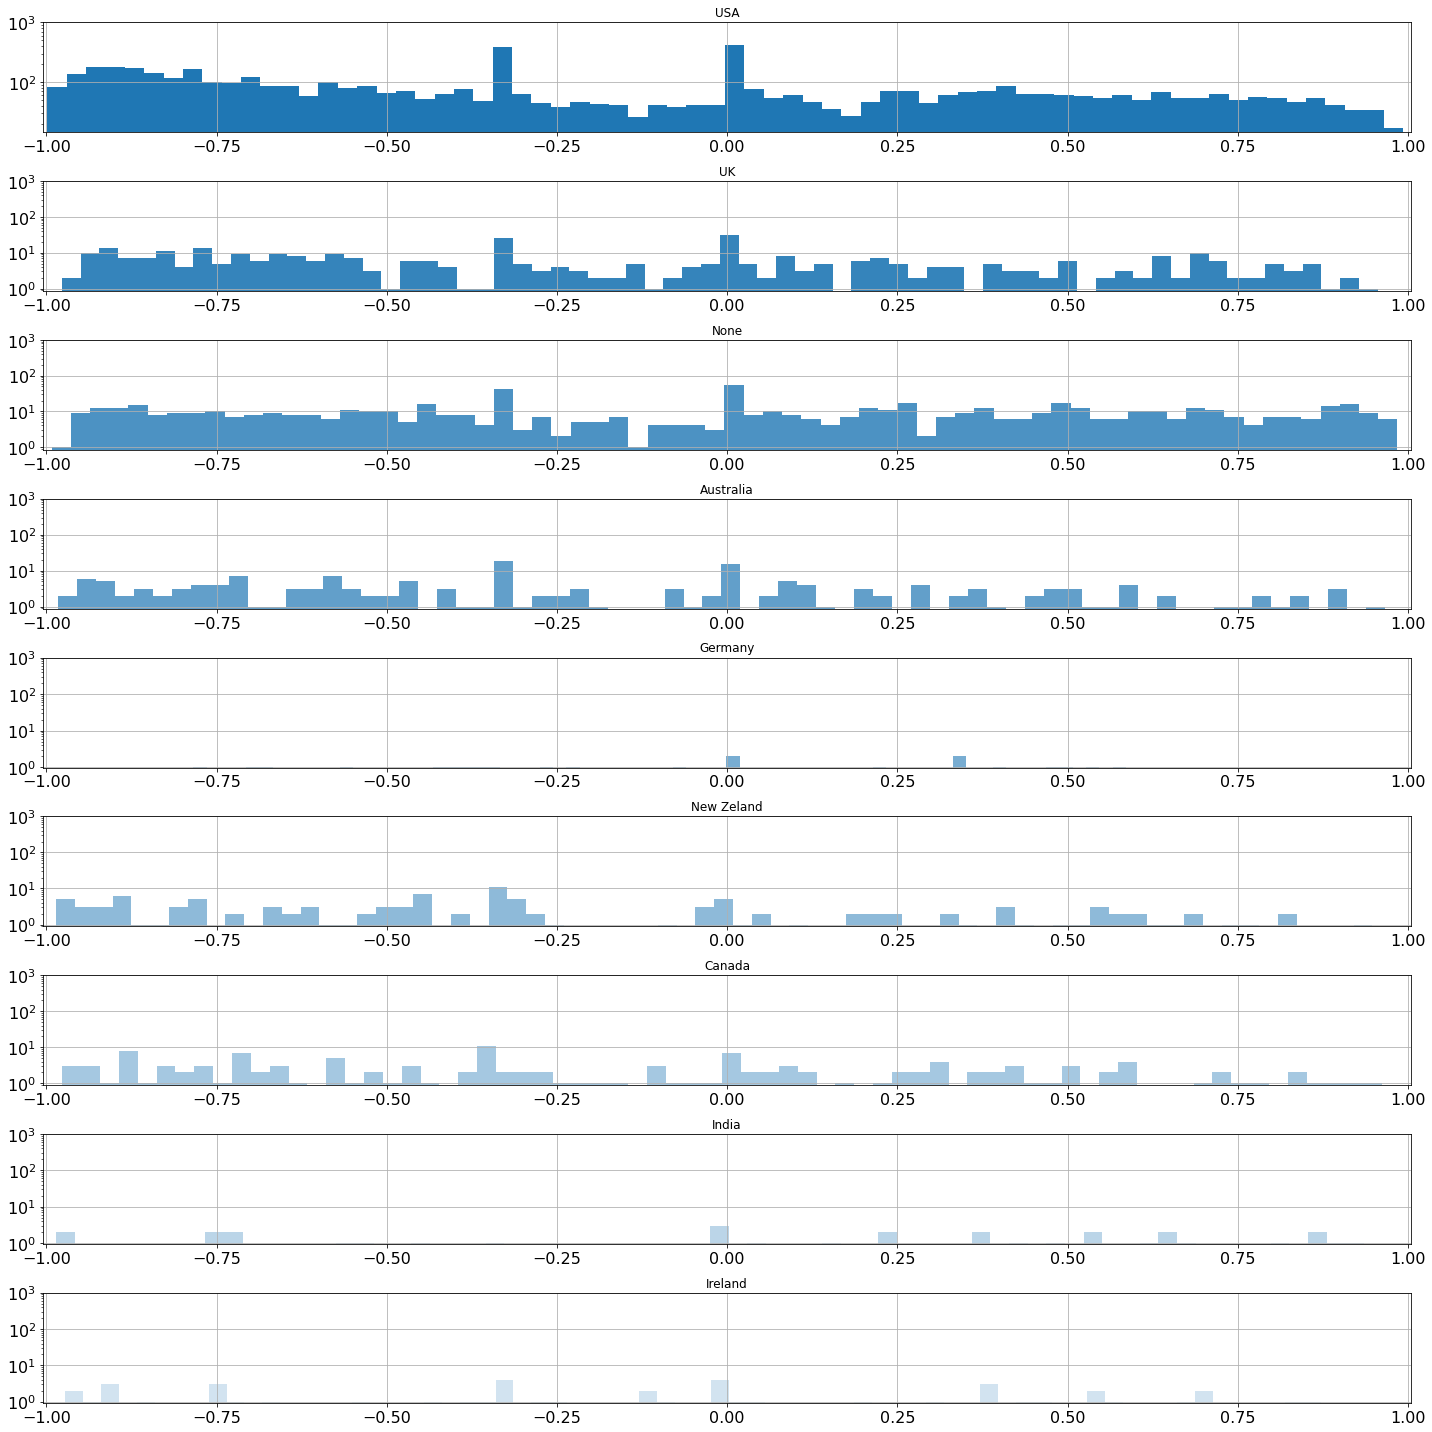

In [91]:
# Gun control: observing distrubutions of compound score over nationality

fig, axs = plt.subplots(9,figsize=(20,20))
alpha_score = 1

for i in range(0,9):
    nation = gc_at_nat['nation'].unique()[i]
    weight = np.ones(gc_at_nat[gc_at_nat['nation'] == nation]['compound scores'].shape[0])/gc_at_nat[gc_at_nat['nation'] == nation]['compound scores'].shape[0]
    axs[i].hist(gc_at_nat[gc_at_nat['nation'] == nation]['compound scores'], alpha =alpha_score,  bins = 70)
    axs[i].title.set_text(nation)
    alpha_score -= 0.1
    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
    axs[i].set_ylim([0, 10**3])
    
    # set yaxis to percentage
    #axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # make the plot tight
    fig.tight_layout()

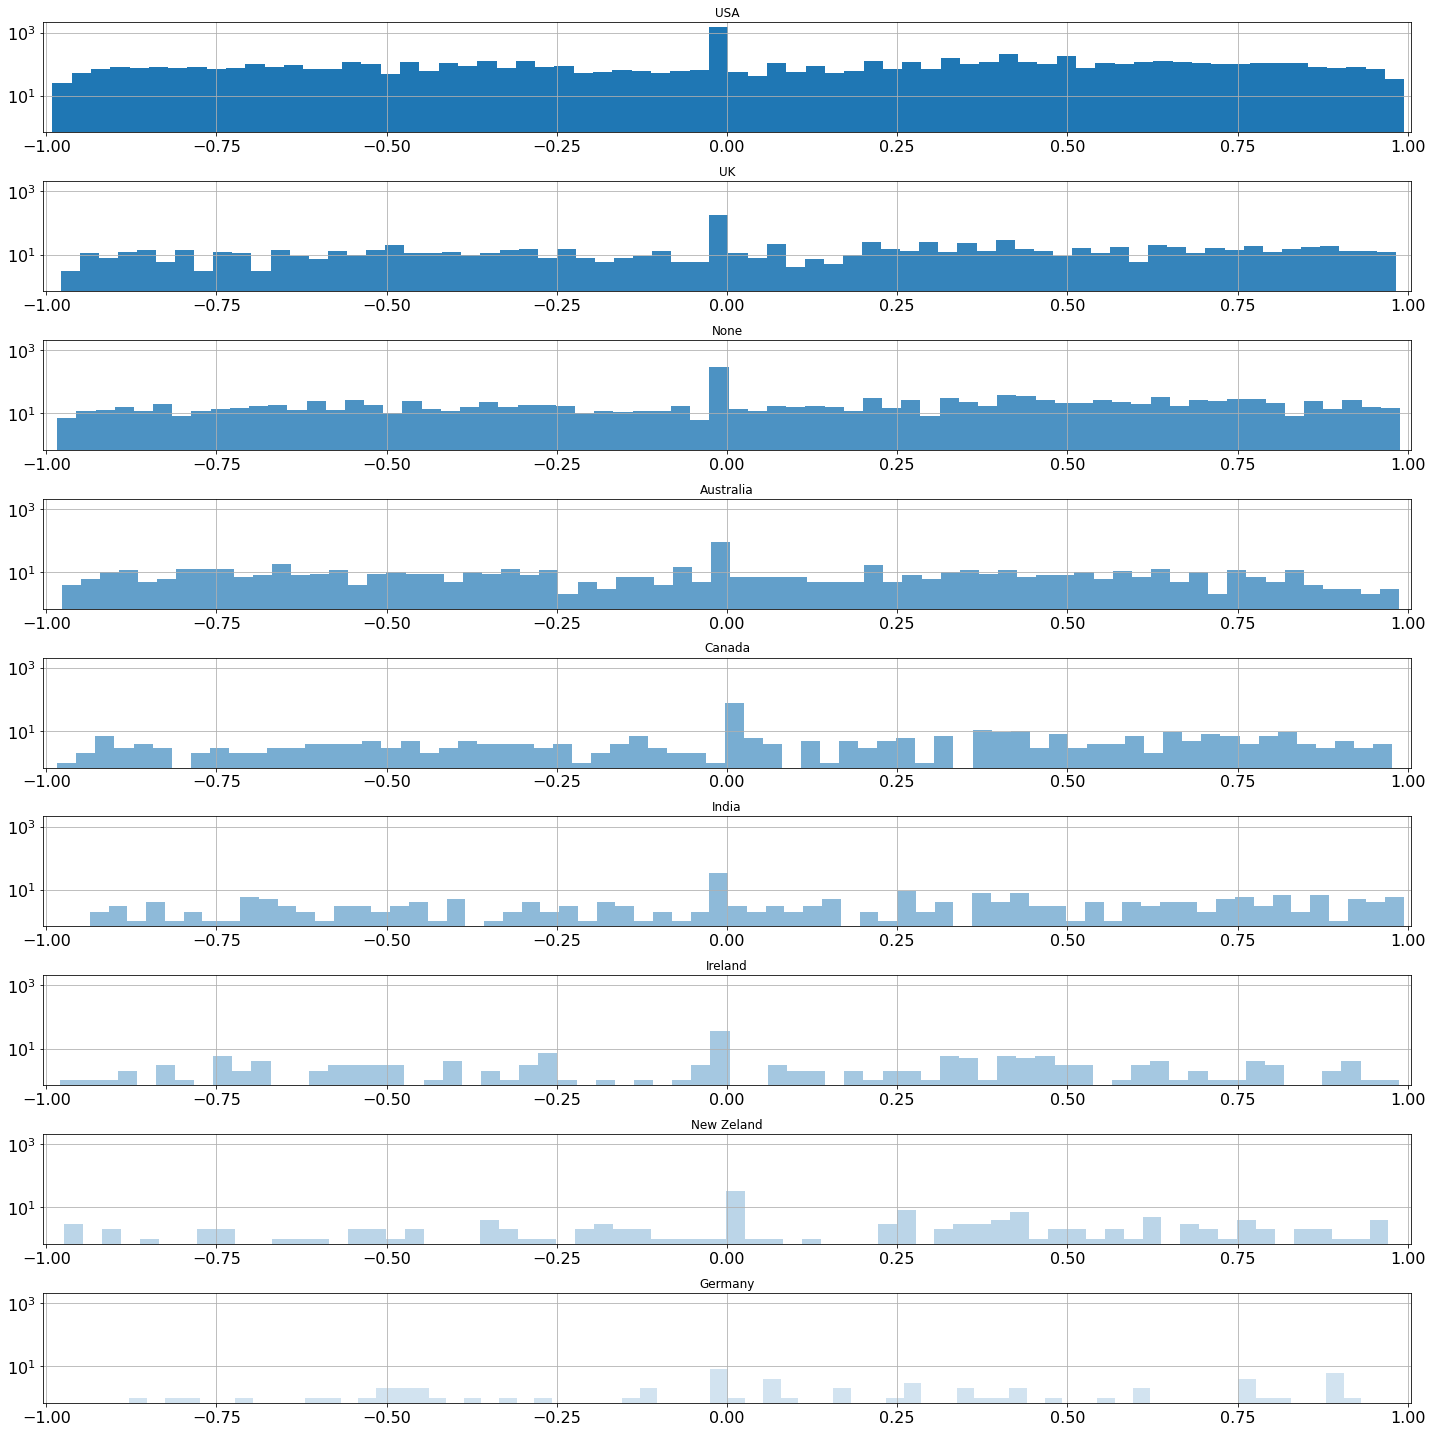

In [92]:
# Abortion: observing distrubutions of compound score over nationality

fig, axs = plt.subplots(9,figsize=(20,20), sharey = True)
alpha_score = 1

for i in range(0,9):
    nation = ab_at_nat['nation'].unique()[i]
    weight = np.ones(ab_at_nat[ab_at_nat['nation'] == nation]['compound scores'].shape[0])/ab_at_nat[ab_at_nat['nation'] == nation]['compound scores'].shape[0]
    axs[i].hist(ab_at_nat[ab_at_nat['nation'] == nation]['compound scores'], alpha =alpha_score,  bins = 70)
    axs[i].title.set_text(nation)
    alpha_score -= 0.1
    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])

    # set yaxis to percentage
   # axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # make the plot tight
    fig.tight_layout()

### Education

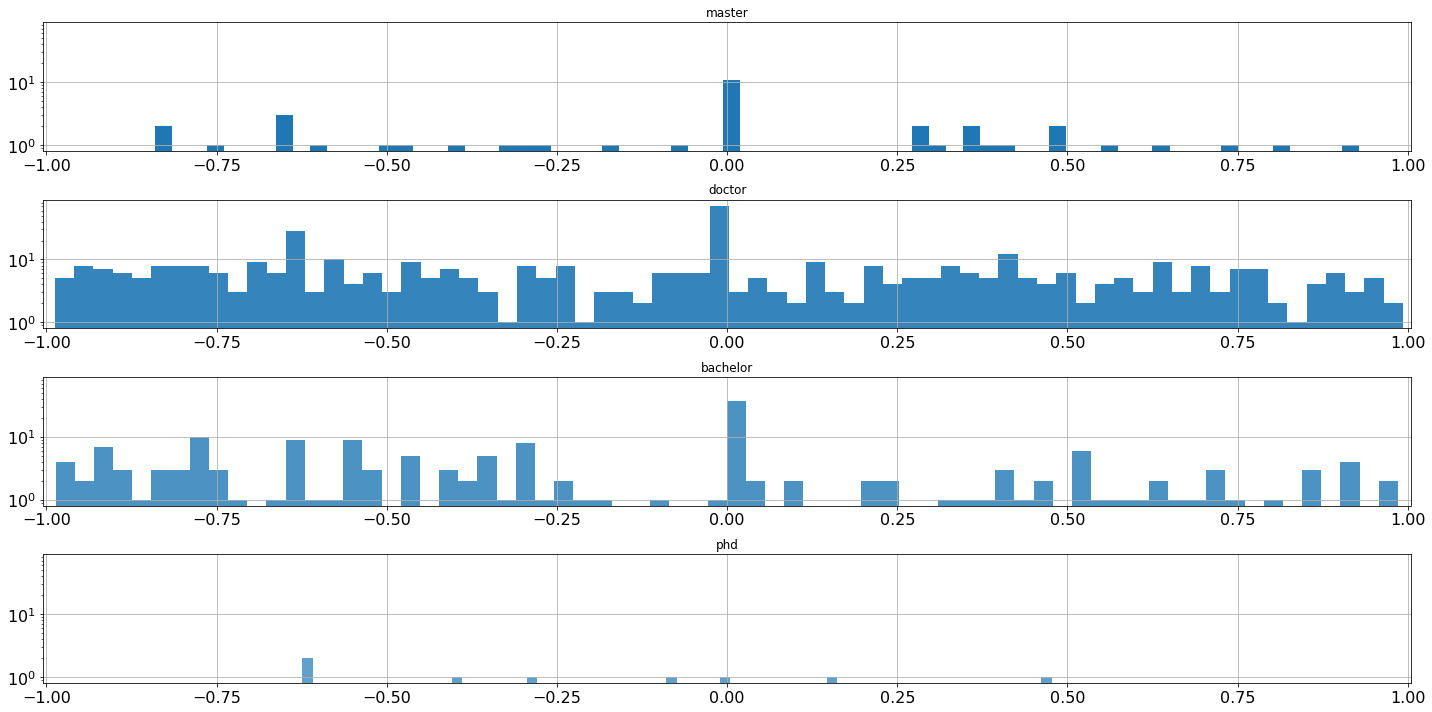

In [93]:
# Gender inequality: observing distrubutions of compound score over education

fig, axs = plt.subplots(4,figsize=(20,10), sharey = True)
alpha_score = 1

for i in range(0,4):
    degree = gi_at_deg['degree'].unique()[i]
    weight = np.ones(gi_at_deg[gi_at_deg['degree'] == degree]['compound scores'].shape[0])/gi_at_deg[gi_at_deg['degree'] == degree]['compound scores'].shape[0]
    axs[i].hist(gi_at_deg[gi_at_deg['degree'] == degree]['compound scores'], alpha =alpha_score,  bins = 70)
    axs[i].title.set_text(degree)
    alpha_score -= 0.1
    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
   # axs[i].set_ylim([0, 10**])
    
    # set yaxis to percentage
   # axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # make the plot tight
    fig.tight_layout()

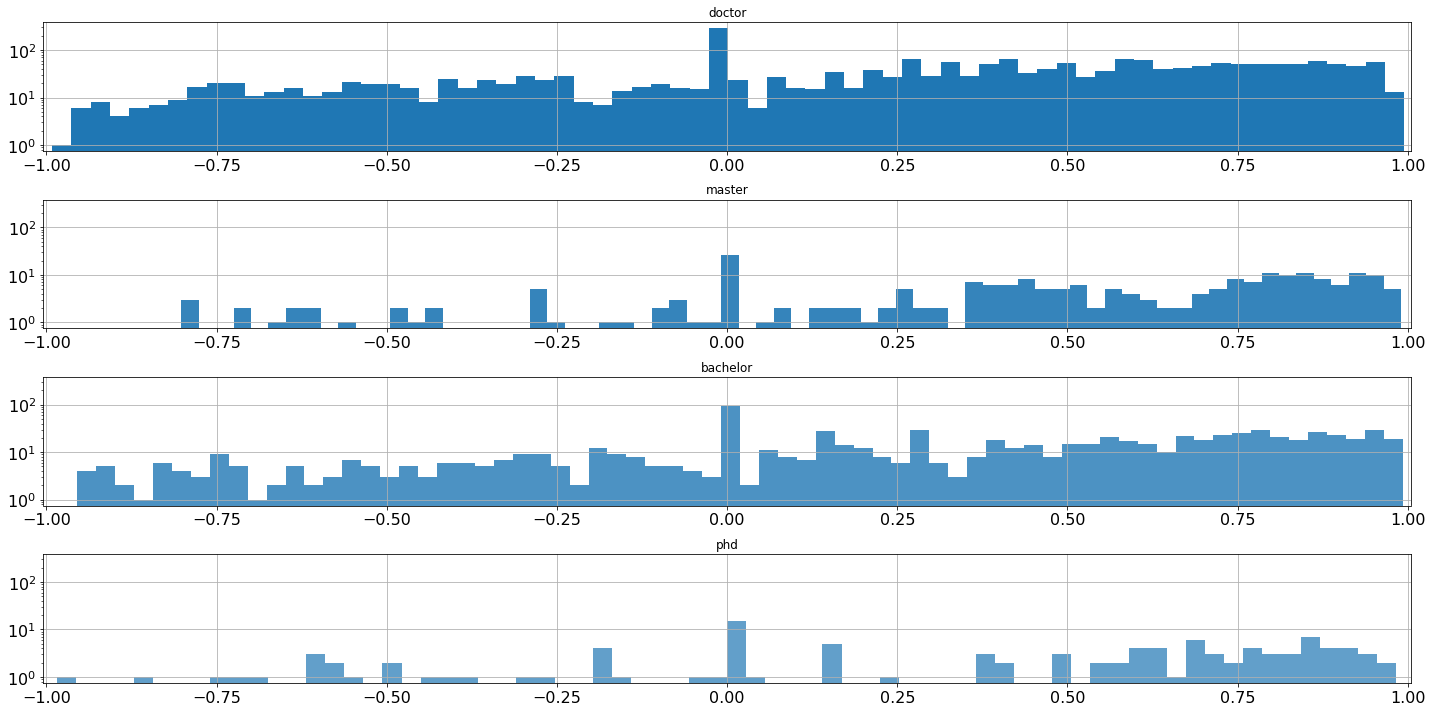

In [94]:
# Global warming: observing distrubutions of compound score over education

fig, axs = plt.subplots(4,figsize=(20,10), sharey = True)
alpha_score = 1

for i in range(0,4):
    degree = gw_at_deg['degree'].unique()[i]
    weight = np.ones(gw_at_deg[gw_at_deg['degree'] == degree]['compound scores'].shape[0])/gw_at_deg[gw_at_deg['degree'] == degree]['compound scores'].shape[0]
    axs[i].hist(gw_at_deg[gw_at_deg['degree'] == degree]['compound scores'], alpha =alpha_score,  bins = 70)
    axs[i].title.set_text(degree)
    alpha_score -= 0.1
    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
   # axs[i].set_ylim([0, 10**])
    
    # set yaxis to percentage
   # axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # make the plot tight
    fig.tight_layout()

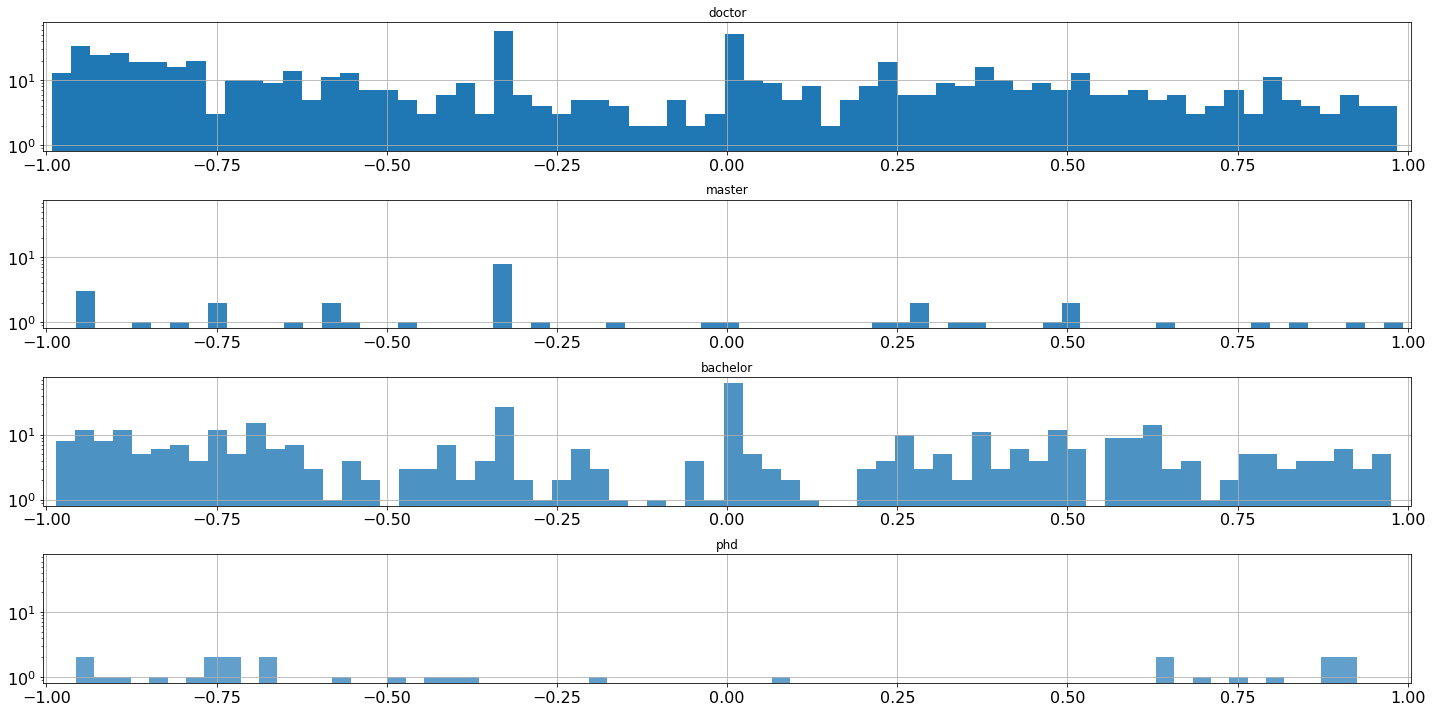

In [96]:
# Gun control: observing distrubutions of compound score over education

fig, axs = plt.subplots(4,figsize=(20,10), sharey = True)
alpha_score = 1

for i in range(0,4):
    degree = gc_at_deg['degree'].unique()[i]
    weight = np.ones(gc_at_deg[gc_at_deg['degree'] == degree]['compound scores'].shape[0])/gc_at_deg[gc_at_deg['degree'] == degree]['compound scores'].shape[0]
    axs[i].hist(gc_at_deg[gc_at_deg['degree'] == degree]['compound scores'], alpha =alpha_score,  bins = 70)
    axs[i].title.set_text(degree)
    alpha_score -= 0.1
    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
   # axs[i].set_ylim([0, 10**])
    
    # set yaxis to percentage
   # axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # make the plot tight
    fig.tight_layout()

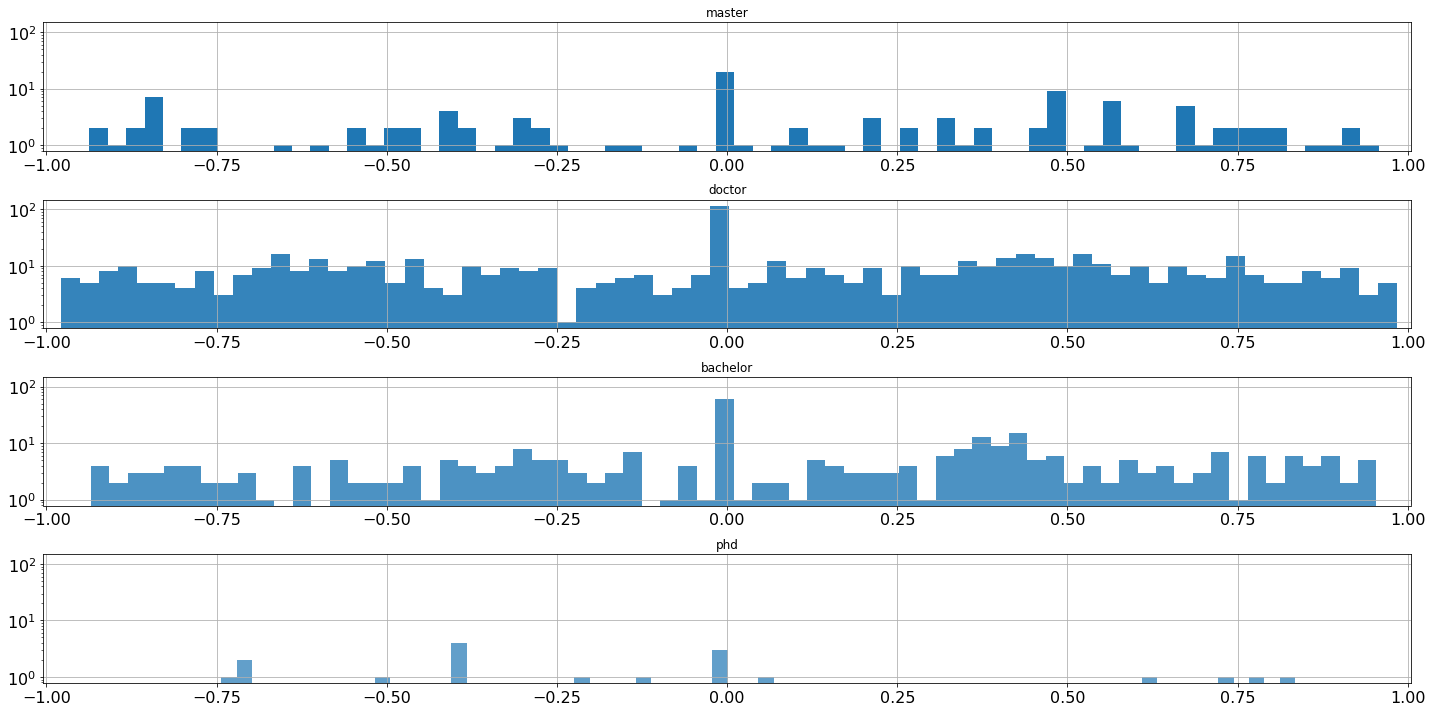

In [97]:
# Abortion: observing distrubutions of compound score over education

fig, axs = plt.subplots(4,figsize=(20,10), sharey = True)
alpha_score = 1

for i in range(0,4):
    degree = ab_at_deg['degree'].unique()[i]
    weight = np.ones(ab_at_deg[ab_at_deg['degree'] == degree]['compound scores'].shape[0])/ab_at_deg[ab_at_deg['degree'] == degree]['compound scores'].shape[0]
    axs[i].hist(ab_at_deg[ab_at_deg['degree'] == degree]['compound scores'], alpha =alpha_score,  bins = 70)
    axs[i].title.set_text(degree)
    alpha_score -= 0.1
    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
   # axs[i].set_ylim([0, 10**])
    
    # set yaxis to percentage
   # axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # make the plot tight
    fig.tight_layout()

C:\ProgramData\Anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


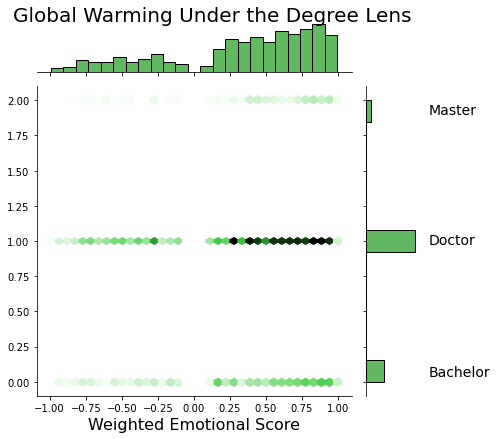

In [194]:
# Global warming: observing distrubutions of compound score over degree

# encode the degree attributes to numbers to be able to plot
enc = LabelEncoder()
enc.fit( gw_at_deg['degree'])
degrees_num= enc.transform( gw_at_deg[np.abs(gw_at_deg['compound scores'] ) >=0.1]['degree'])

g=sns.jointplot(gw_at_deg[np.abs(gw_at_deg['compound scores'] ) >=0.1]['compound scores'],degrees_num, kind="hex", color = 'C2')           
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16)                        

# include the proper labels on the right of the graphs since jointplots do not allow us to change the ylabels
g.fig.text( 1, 0.76,'Master', fontsize=14)
g.fig.text( 1, 0.46,'Doctor', fontsize=14)
g.fig.text( 1, 0.155,'Bachelor', fontsize=14)

g.fig.tight_layout()
g.fig.suptitle('Global Warming Under the Degree Lens', y = 1.01,fontsize = 20)

None

# save
g.savefig('Figures/gw_deg.jpeg', dpi = 200)
g.savefig('Figures/gw_deg.pdf')

C:\ProgramData\Anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


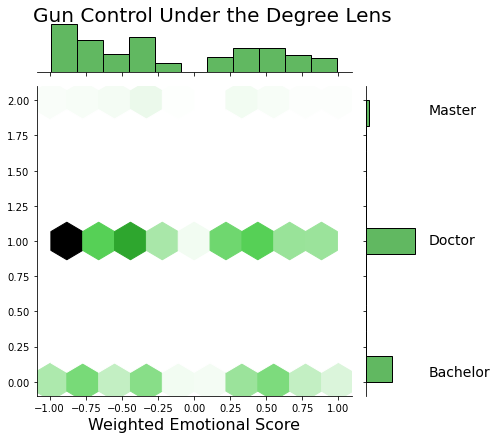

In [195]:
# Gun control: observing distrubutions of compound score over degree

# encode the degree attributes to numbers to be able to plot
enc = LabelEncoder()
enc.fit( gc_at_deg['degree'])
degrees_num= enc.transform( gc_at_deg[np.abs(gc_at_deg['compound scores'] ) >=0.1]['degree'])

g=sns.jointplot(gc_at_deg[np.abs(gc_at_deg['compound scores'] ) >=0.1]['compound scores'],degrees_num, kind="hex", color = 'C2')           
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16)                        

# include the proper labels on the right of the graphs since jointplots do not allow us to change the ylabels
g.fig.text( 1, 0.76,'Master', fontsize=14)
g.fig.text( 1, 0.46,'Doctor', fontsize=14)
g.fig.text( 1, 0.155,'Bachelor', fontsize=14)

g.fig.tight_layout()
g.fig.suptitle('Gun Control Under the Degree Lens', y = 1.01,fontsize = 20)

None

# save
g.savefig('Figures/gc_deg.jpeg', dpi = 200)
g.savefig('Figures/gc_deg.pdf')

C:\ProgramData\Anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


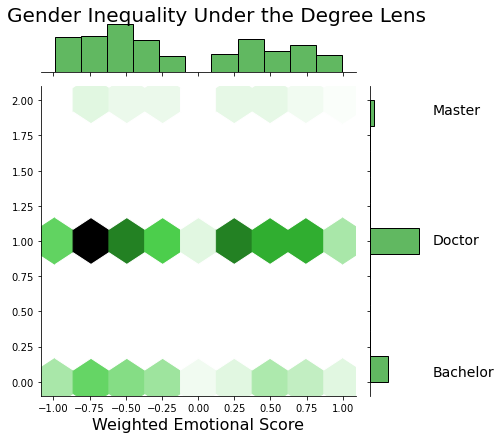

In [196]:
# Gender inequality: observing distrubutions of compound score over degree

# encode the degree attributes to numbers to be able to plot
enc = LabelEncoder()
enc.fit( gi_at_deg['degree'])
degrees_num= enc.transform( gi_at_deg[np.abs(gi_at_deg['compound scores'] ) >=0.1]['degree'])

g=sns.jointplot(gi_at_deg[np.abs(gi_at_deg['compound scores'] ) >=0.1]['compound scores'],degrees_num, kind="hex", color = 'C2')           
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16)                        

# include the proper labels on the right of the graphs since jointplots do not allow us to change the ylabels
g.fig.text( 1, 0.76,'Master', fontsize=14)
g.fig.text( 1, 0.46,'Doctor', fontsize=14)
g.fig.text( 1, 0.155,'Bachelor', fontsize=14)

g.fig.tight_layout()
g.fig.suptitle('Gender Inequality Under the Degree Lens', y = 1.01,fontsize = 20)

None

# save
g.savefig('Figures/gi_deg.jpeg', dpi = 200)
g.savefig('Figures/gi_deg.pdf')


C:\ProgramData\Anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


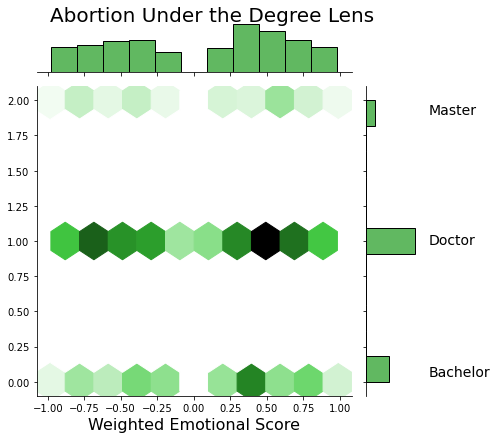

In [197]:
# Abortion: observing distrubutions of compound score over degree

# encode the degree attributes to numbers to be able to plot
enc = LabelEncoder()
enc.fit( ab_at_deg['degree'])
degrees_num= enc.transform( ab_at_deg[np.abs(ab_at_deg['compound scores'] ) >=0.1]['degree'])

g=sns.jointplot(ab_at_deg[np.abs(ab_at_deg['compound scores'] ) >=0.1]['compound scores'],degrees_num, kind="hex", color = 'C2')           
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16)                        

# include the proper labels on the right of the graphs since jointplots do not allow us to change the ylabels
g.fig.text( 1, 0.76,'Master', fontsize=14)
g.fig.text( 1, 0.46,'Doctor', fontsize=14)
g.fig.text( 1, 0.155,'Bachelor', fontsize=14)

g.fig.tight_layout()
g.fig.suptitle('Abortion Under the Degree Lens', y = 1.01,fontsize = 20)

None

g.savefig('Figures/ab_deg.jpeg', dpi = 200)
g.savefig('Figures/ab_deg.pdf')

### Under the religion lens

C:\ProgramData\Anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


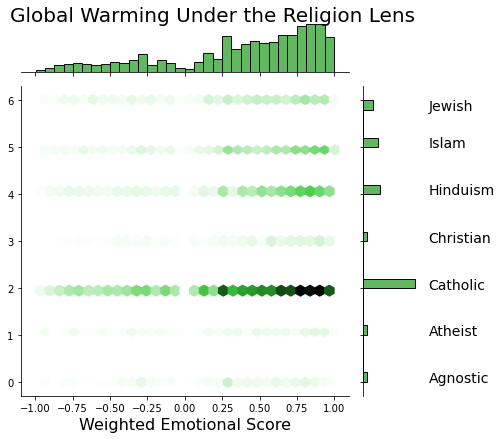

In [147]:
# Global warming: observing distrubutions of compound score over religion

#encoding labels
enc = LabelEncoder()
enc.fit( gw_at_rel['rel'])
rel_num= enc.transform( gw_at_rel[np.abs(gw_at_rel['compound scores'] ) >=0.05]['rel'])


g=sns.jointplot(gw_at_rel[np.abs(gw_at_rel['compound scores'] ) >=0.05]['compound scores'], rel_num, kind="hex", color = 'C2', alpha = 1)
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16) 
 
g.fig.text( 1, 0.77,'Jewish', fontsize=14)
g.fig.text( 1, 0.685,'Islam', fontsize=14)
g.fig.text( 1, 0.575,'Hinduism', fontsize=14)
g.fig.text( 1, 0.465,'Christian', fontsize=14)
g.fig.text( 1, 0.355,'Catholic', fontsize=14)
g.fig.text( 1, 0.25,'Atheist', fontsize=14)
g.fig.text( 1, 0.14,'Agnostic', fontsize=14)
g.fig.tight_layout()
g.fig.suptitle('Global Warming Under the Religion Lens', y = 1.01,fontsize = 20)

g.savefig('Figures/gw_rel.jpeg', dpi = 200)
g.savefig('Figures/gw_rel.pdf')
              

C:\ProgramData\Anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


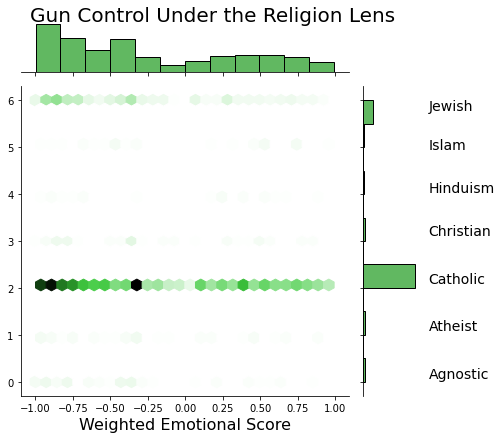

In [154]:
# Gun control: observing distrubutions of compound score over religion

#encoding labels
enc = LabelEncoder()
enc.fit( gc_at_rel['rel'])
rel_num= enc.transform( gc_at_rel[np.abs(gc_at_rel['compound scores'] ) >=0.05]['rel'])


g=sns.jointplot(gc_at_rel[np.abs(gc_at_rel['compound scores'] ) >=0.05]['compound scores'], rel_num, kind="hex", color = 'C2', alpha = 1)
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16) 
 
g.fig.text( 1, 0.77,'Jewish', fontsize=14)
g.fig.text( 1, 0.68,'Islam', fontsize=14)
g.fig.text( 1, 0.58,'Hinduism', fontsize=14)
g.fig.text( 1, 0.48,'Christian', fontsize=14)
g.fig.text( 1, 0.37,'Catholic', fontsize=14)
g.fig.text( 1, 0.26,'Atheist', fontsize=14)
g.fig.text( 1, 0.15,'Agnostic', fontsize=14)
g.fig.tight_layout()
g.fig.suptitle('Gun Control Under the Religion Lens', y = 1.01,fontsize = 20)

g.savefig('Figures/gc_rel.jpeg', dpi = 200)
g.savefig('Figures/gc_rel.pdf')
              

C:\ProgramData\Anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


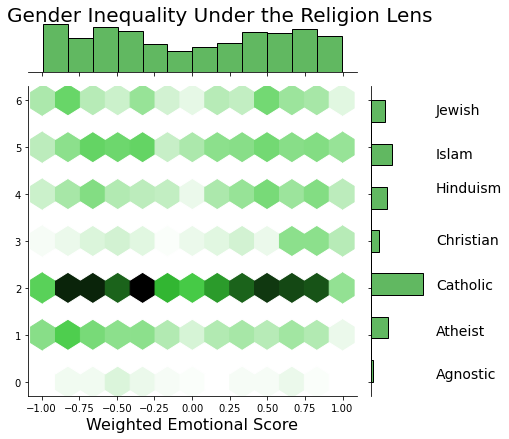

In [160]:
# Gender inequality: observing distrubutions of compound score over religion

enc = LabelEncoder()
enc.fit( gi_at_rel['rel'])
rel_num= enc.transform( gi_at_rel[np.abs(gi_at_rel['compound scores'] ) >=0.05]['rel'])


g=sns.jointplot(gi_at_rel[np.abs(gi_at_rel['compound scores'] ) >=0.05]['compound scores'], rel_num, kind="hex", color = 'C2', alpha = 1)
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16) 
 
g.fig.text( 1, 0.76,'Jewish', fontsize=14)
g.fig.text( 1, 0.658,'Islam', fontsize=14)
g.fig.text( 1, 0.58,'Hinduism', fontsize=14)
g.fig.text( 1, 0.46,'Christian', fontsize=14)
g.fig.text( 1, 0.355,'Catholic', fontsize=14)
g.fig.text( 1, 0.25,'Atheist', fontsize=14)
g.fig.text( 1, 0.15,'Agnostic', fontsize=14)
g.fig.tight_layout()
g.fig.suptitle('Gender Inequality Under the Religion Lens', y = 1.01,fontsize = 20)

g.savefig('Figures/gi_rel.jpeg', dpi = 200)
g.savefig('Figures/gi_rel.pdf')
              

C:\ProgramData\Anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


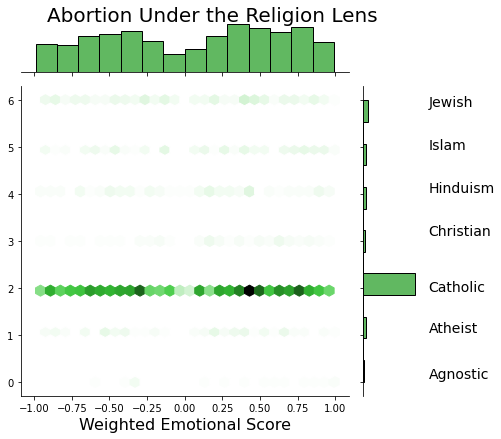

In [161]:
# Abortion: observing distrubutions of compound score over religion

enc = LabelEncoder()
enc.fit( ab_at_rel['rel'])
rel_num= enc.transform( ab_at_rel[np.abs(ab_at_rel['compound scores'] ) >=0.05]['rel'])


g=sns.jointplot(ab_at_rel[np.abs(ab_at_rel['compound scores'] ) >=0.05]['compound scores'], rel_num, kind="hex", color = 'C2', alpha = 1)
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16) 
 
g.fig.text( 1, 0.78,'Jewish', fontsize=14)
g.fig.text( 1, 0.68,'Islam', fontsize=14)
g.fig.text( 1, 0.58,'Hinduism', fontsize=14)
g.fig.text( 1, 0.48,'Christian', fontsize=14)
g.fig.text( 1, 0.35,'Catholic', fontsize=14)
g.fig.text( 1, 0.255,'Atheist', fontsize=14)
g.fig.text( 1, 0.15,'Agnostic', fontsize=14)
g.fig.tight_layout()
g.fig.suptitle('Abortion Under the Religion Lens', y = 1.01,fontsize = 20)

g.savefig('Figures/ab_rel.jpeg', dpi = 200)
g.savefig('Figures/ab_rel.pdf')

### Under the nationality lens

C:\ProgramData\Anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


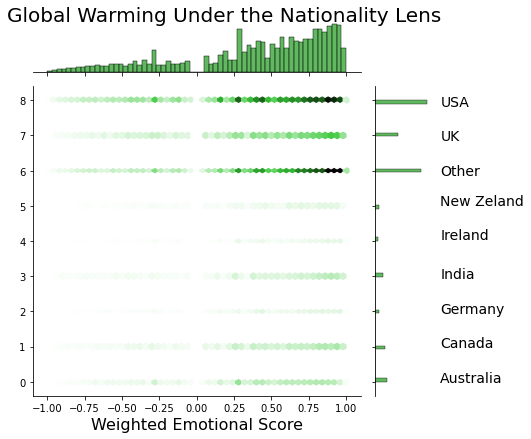

In [162]:
# Global warming: observing distrubutions of compound score over nationality

enc = LabelEncoder()
enc.fit( gw_at_nat['nation'])
nat_num= enc.transform( gw_at_nat[ (np.abs(gw_at_nat['compound scores'] ) >=0.05)]['nation'])


g=sns.jointplot(gw_at_nat[np.abs(gw_at_nat['compound scores'] ) >=0.05]['compound scores'], nat_num, kind="hex", color = 'C2', alpha = 1)
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16)                       
          
g.fig.text( 1, 0.78,'USA', fontsize=14)
g.fig.text( 1, 0.7,'UK', fontsize=14)
g.fig.text( 1, 0.62,'Other', fontsize=14)
g.fig.text( 1, 0.55,'New Zeland', fontsize=14)
g.fig.text( 1, 0.47,'Ireland', fontsize=14)
g.fig.text( 1, 0.38,'India', fontsize=14)
g.fig.text( 1, 0.3,'Germany', fontsize=14)
g.fig.text( 1, 0.22,'Canada', fontsize=14)
g.fig.text( 1, 0.14,'Australia', fontsize=14)   
    
g.fig.tight_layout()
g.fig.suptitle('Global Warming Under the Nationality Lens', y = 1.01,fontsize = 20)  

g.savefig('Figures/gw_nat.jpeg', dpi = 200)
g.savefig('Figures/gw_nat.pdf')

C:\ProgramData\Anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


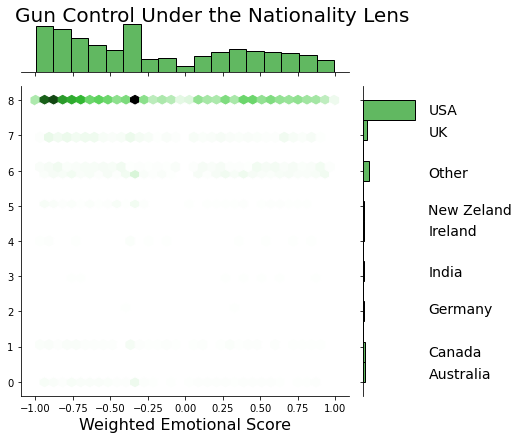

In [168]:
# Gun control: observing distrubutions of compound score over nationality

enc = LabelEncoder()
enc.fit( gc_at_nat['nation'])
nat_num= enc.transform( gc_at_nat[ (np.abs(gc_at_nat['compound scores'] ) >=0.05)]['nation'])


g=sns.jointplot(gc_at_nat[np.abs(gc_at_nat['compound scores'] ) >=0.05]['compound scores'], nat_num, kind="hex", color = 'C2', alpha = 1)
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16)                       
          
g.fig.text( 1, 0.76,'USA', fontsize=14)
g.fig.text( 1, 0.71,'UK', fontsize=14)
g.fig.text( 1, 0.615,'Other', fontsize=14)
g.fig.text( 1, 0.53,'New Zeland', fontsize=14)
g.fig.text( 1, 0.48,'Ireland', fontsize=14)
g.fig.text( 1, 0.385,'India', fontsize=14)
g.fig.text( 1, 0.3,'Germany', fontsize=14)
g.fig.text( 1, 0.20,'Canada', fontsize=14)
g.fig.text( 1, 0.15,'Australia', fontsize=14)   
    
g.fig.tight_layout()
g.fig.suptitle('Gun Control Under the Nationality Lens', y = 1.01,fontsize = 20)  

g.savefig('Figures/gc_nat.jpeg', dpi = 200)
g.savefig('Figures/gc_nat.pdf')

C:\ProgramData\Anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


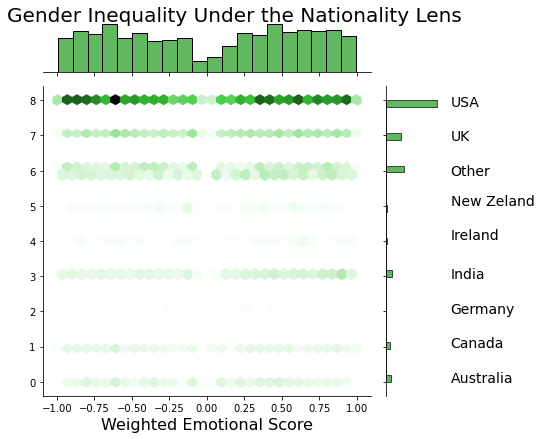

In [171]:
# Gender inequality: observing distrubutions of compound score over nationality

enc = LabelEncoder()
enc.fit( gi_at_nat['nation'])
nat_num= enc.transform( gi_at_nat[ (np.abs(gi_at_nat['compound scores'] ) >=0.05)]['nation'])


g=sns.jointplot(gi_at_nat[np.abs(gi_at_nat['compound scores'] ) >=0.05]['compound scores'], nat_num, kind="hex", color = 'C2', alpha = 1)
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16)                       
          
g.fig.text( 1, 0.78,'USA', fontsize=14)
g.fig.text( 1, 0.7,'UK', fontsize=14)
g.fig.text( 1, 0.62,'Other', fontsize=14)
g.fig.text( 1, 0.55,'New Zeland', fontsize=14)
g.fig.text( 1, 0.47,'Ireland', fontsize=14)
g.fig.text( 1, 0.38,'India', fontsize=14)
g.fig.text( 1, 0.3,'Germany', fontsize=14)
g.fig.text( 1, 0.22,'Canada', fontsize=14)
g.fig.text( 1, 0.14,'Australia', fontsize=14)   
    
g.fig.tight_layout()
g.fig.suptitle('Gender Inequality Under the Nationality Lens', y = 1.01,fontsize = 20)     

g.savefig('Figures/gi_nat.jpeg', dpi = 200)
g.savefig('Figures/gi_nat.pdf')


C:\ProgramData\Anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


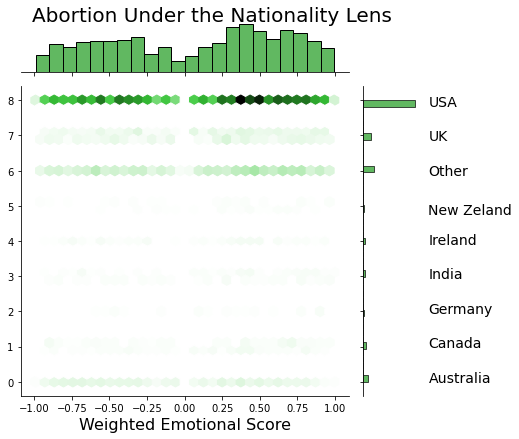

In [178]:
# Abortion: observing distrubutions of compound score over nationality

enc = LabelEncoder()
enc.fit( ab_at_nat['nation'])
nat_num= enc.transform( ab_at_nat[ (np.abs(ab_at_nat['compound scores'] ) >=0.05)]['nation'])


g=sns.jointplot(ab_at_nat[np.abs(ab_at_nat['compound scores'] ) >=0.05]['compound scores'], nat_num, kind="hex", color = 'C2', alpha = 1)
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16)                       
          
g.fig.text( 1, 0.78,'USA', fontsize=14)
g.fig.text( 1, 0.7,'UK', fontsize=14)
g.fig.text( 1, 0.62,'Other', fontsize=14)
g.fig.text( 1, 0.53,'New Zeland', fontsize=14)
g.fig.text( 1, 0.46,'Ireland', fontsize=14)
g.fig.text( 1, 0.38,'India', fontsize=14)
g.fig.text( 1, 0.3,'Germany', fontsize=14)
g.fig.text( 1, 0.22,'Canada', fontsize=14)
g.fig.text( 1, 0.14,'Australia', fontsize=14)   
    
g.fig.tight_layout()
g.fig.suptitle('Abortion Under the Nationality Lens', y = 1.01,fontsize = 20)  

g.savefig('Figures/ab_nat.jpeg', dpi = 200)
g.savefig('Figures/ab_nat.pdf')

### Year of birth

##### Global warming

In [35]:
#Grouping by year of birth
gw_at_birth=gw_at.copy()
gw_at_birth['birth_year']=pd.cut(gw_at_birth['year_of_birth'], [1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990,2000], labels=['1910-s','1920-s','1930-s','1940-s','1950-s','1960-s','1970-s','1980-s','1990-s'])
gw_at_birth=gw_at_birth.dropna(subset=['birth_year']).copy()

C:\ProgramData\Anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


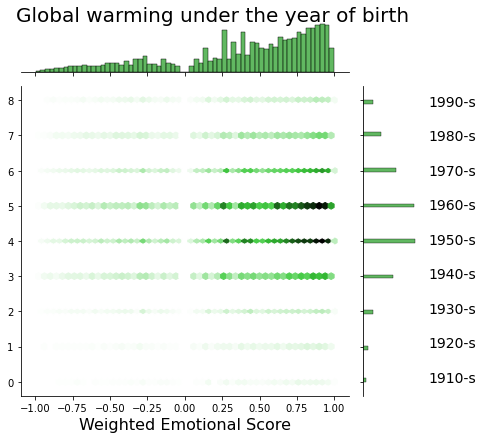

In [182]:
# Global warming: observing distrubutions of compound score over year of birth

enc = LabelEncoder()
enc.fit(gw_at_birth['birth_year'])
degrees_num=  enc.transform(gw_at_birth[np.abs(gw_at_birth['compound scores'] ) >=0.05]['birth_year']) #enc.transform(

g=sns.jointplot(gw_at_birth[np.abs(gw_at_birth['compound scores'] ) >=0.05]['compound scores'], degrees_num, kind="hex", color = 'C2', alpha = 1)

g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16)                       
          
g.fig.text( 1, 0.78,'1990-s', fontsize=14)
g.fig.text( 1, 0.7,'1980-s', fontsize=14)
g.fig.text( 1, 0.62,'1970-s', fontsize=14)
g.fig.text( 1, 0.54,'1960-s', fontsize=14)
g.fig.text( 1, 0.46,'1950-s', fontsize=14)
g.fig.text( 1, 0.38,'1940-s', fontsize=14)
g.fig.text( 1, 0.3,'1930-s', fontsize=14)
g.fig.text( 1, 0.22,'1920-s', fontsize=14)
g.fig.text( 1, 0.14,'1910-s', fontsize=14)   
    
g.fig.tight_layout()
g.fig.suptitle('Global warming under the year of birth', y = 1.01,fontsize = 20)

g.savefig('Figures/gw_birth.jpeg', dpi = 200)
g.savefig('Figures/gw_birth.pdf')

##### Abortion

In [37]:
#Grouping by year of birth
ab_at_birth=ab_at.copy()
ab_at_birth['birth_year']=pd.cut(ab_at_birth['year_of_birth'], [1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990,2000], labels=['1910-s','1920-s','1930-s','1940-s','1950-s','1960-s','1970-s','1980-s','1990-s'])
ab_at_birth=ab_at_birth.dropna(subset=['birth_year']).copy()

C:\ProgramData\Anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


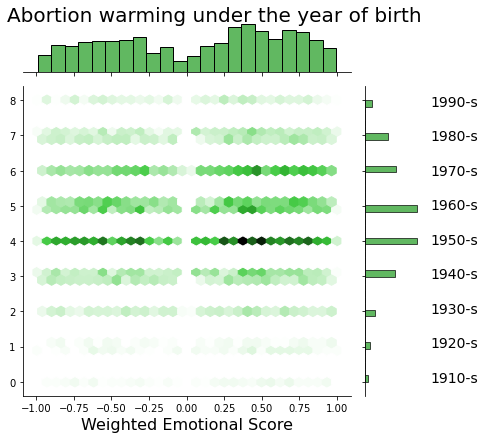

In [183]:
# Abortion: observing distrubutions of compound score over year of birth

enc = LabelEncoder()
enc.fit(ab_at_birth['birth_year'])
degrees_num=  enc.transform(ab_at_birth[np.abs(ab_at_birth['compound scores'] ) >=0.05]['birth_year']) #enc.transform(

g = sns.jointplot(ab_at_birth[np.abs(ab_at_birth['compound scores'] ) >=0.05]['compound scores'], degrees_num, kind="hex", color = 'C2', alpha = 1) 
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16)                       
          
g.fig.text( 1, 0.78,'1990-s', fontsize=14)
g.fig.text( 1, 0.7,'1980-s', fontsize=14)
g.fig.text( 1, 0.62,'1970-s', fontsize=14)
g.fig.text( 1, 0.54,'1960-s', fontsize=14)
g.fig.text( 1, 0.46,'1950-s', fontsize=14)
g.fig.text( 1, 0.38,'1940-s', fontsize=14)
g.fig.text( 1, 0.3,'1930-s', fontsize=14)
g.fig.text( 1, 0.22,'1920-s', fontsize=14)
g.fig.text( 1, 0.14,'1910-s', fontsize=14)   
    
g.fig.tight_layout()
g.fig.suptitle('Abortion warming under the year of birth', y = 1.01,fontsize = 20)

g.savefig('Figures/ab_birth.jpeg', dpi = 200)
g.savefig('Figures/ab_birth.pdf')

##### Gun control

In [39]:
#Grouping by year of birth
gc_at_birth=gc_at.copy()
gc_at_birth['birth_year']=pd.cut(gc_at_birth['year_of_birth'], [1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990,2000], labels=['1910-s','1920-s','1930-s','1940-s','1950-s','1960-s','1970-s','1980-s','1990-s'])
gc_at_birth=gc_at_birth.dropna(subset=['birth_year']).copy()

C:\ProgramData\Anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


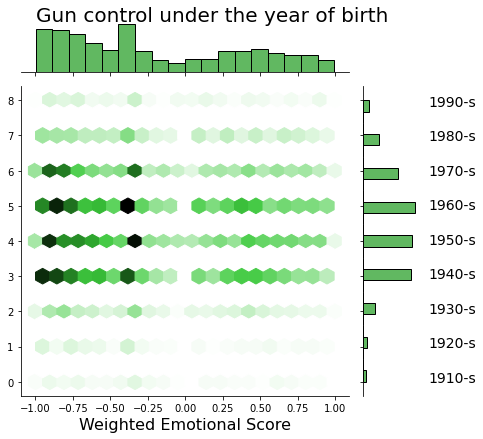

In [185]:
# Gun control: observing distrubutions of compound score over year of birth

enc = LabelEncoder()
enc.fit(gc_at_birth['birth_year'])
degrees_num=  enc.transform(gc_at_birth[np.abs(gc_at_birth['compound scores'] ) >=0.05]['birth_year']) #enc.transform(

g = sns.jointplot(gc_at_birth[np.abs(gc_at_birth['compound scores'] ) >=0.05]['compound scores'], degrees_num, kind="hex", color = 'C2', alpha = 1) 
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16)                       
          
g.fig.text( 1, 0.78,'1990-s', fontsize=14)
g.fig.text( 1, 0.7,'1980-s', fontsize=14)
g.fig.text( 1, 0.62,'1970-s', fontsize=14)
g.fig.text( 1, 0.54,'1960-s', fontsize=14)
g.fig.text( 1, 0.46,'1950-s', fontsize=14)
g.fig.text( 1, 0.38,'1940-s', fontsize=14)
g.fig.text( 1, 0.3,'1930-s', fontsize=14)
g.fig.text( 1, 0.22,'1920-s', fontsize=14)
g.fig.text( 1, 0.14,'1910-s', fontsize=14)   
    
g.fig.tight_layout()
g.fig.suptitle('Gun control under the year of birth', y = 1.01,fontsize = 20)

g.savefig('Figures/gc_birth.jpeg', dpi = 200)
g.savefig('Figures/gc_birth.pdf')
None

##### Gender inequality

In [41]:
#Grouping by year of birth
gi_at_birth=gi_at.copy()
gi_at_birth['birth_year']=pd.cut(gi_at_birth['year_of_birth'], [1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990,2000], labels=['1910-s','1920-s','1930-s','1940-s','1950-s','1960-s','1970-s','1980-s','1990-s'])
gi_at_birth=gi_at_birth.dropna(subset=['birth_year']).copy()

C:\ProgramData\Anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


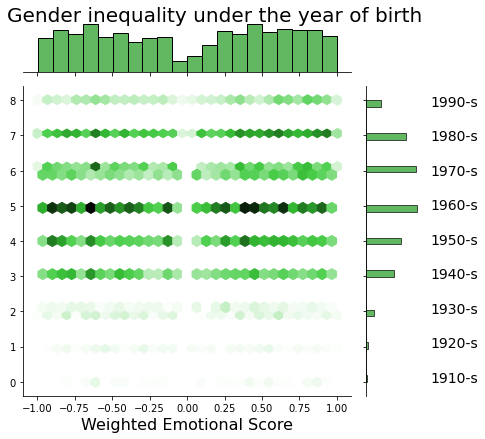

In [186]:
# Gender inequality: observing distrubutions of compound score over year of birth

enc = LabelEncoder()
enc.fit(gi_at_birth['birth_year'])
degrees_num=  enc.transform(gi_at_birth[np.abs(gi_at_birth['compound scores'] ) >=0.05]['birth_year']) #enc.transform(

g = sns.jointplot(gi_at_birth[np.abs(gi_at_birth['compound scores'] ) >=0.05]['compound scores'], degrees_num, kind="hex", color = 'C2', alpha = 1) 
g.ax_joint.set_xlabel('Weighted Emotional Score', fontsize=16)                       
          
g.fig.text( 1, 0.78,'1990-s', fontsize=14)
g.fig.text( 1, 0.7,'1980-s', fontsize=14)
g.fig.text( 1, 0.62,'1970-s', fontsize=14)
g.fig.text( 1, 0.54,'1960-s', fontsize=14)
g.fig.text( 1, 0.46,'1950-s', fontsize=14)
g.fig.text( 1, 0.38,'1940-s', fontsize=14)
g.fig.text( 1, 0.3,'1930-s', fontsize=14)
g.fig.text( 1, 0.22,'1920-s', fontsize=14)
g.fig.text( 1, 0.14,'1910-s', fontsize=14)   
    
g.fig.tight_layout()
g.fig.suptitle('Gender inequality under the year of birth', y = 1.01,fontsize = 20)

g.savefig('Figures/gi_birth.jpeg', dpi = 200)
g.savefig('Figures/gi_birth.pdf')